## Detecção de obstrução em válvulas de máquinas de LC por análise de séries temporais
### IFES - PPCOMP - Mestrado em Computação Aplicada

**Notebook**: Relatório dos Resultados v0.3

Periodo preliminar de análise: 01/2019 e 02/2019 (2 meses)
*****
**Datasets** (40+ Séries Temporais em intervalos de 10/10 segundos)

**Fontes:** 
+ ts_windows.csv (Séries temporais originais segmentadas e indexadas pelas janelas deslizantes)
+ clusters_Strand3.csv (Labels dos clusters gerados para o Veio3 - inedexados pelas janelas deslizantes)
*****

Este Notebook faz o cruzamento dos clusters gerados, com os indices das janelas anômalas, com as séries temporais originais. Tem-se por objetivo uma vizualição preliminar do comportamento do processo com a geração de gráficos para análise das equipes da área.


In [1]:
# Constantes

TAGListVAL_v3=['LC2.K_SLDGT_STR3A_AL_POS']
TAGListVAL_v4=['LC2.L_SLDGT_STR4A_AL_POS']


In [2]:
# Bibliotecas Python em uso no projeto

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler,RobustScaler,Normalizer,MinMaxScaler

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Standard plotly imports
import plotly.offline as py
py.init_notebook_mode(connected=False)
import plotly.graph_objects as go

In [3]:
# Leitura das séries temporais originais segmentadas pelas janelas deslizantes
df_ts=pd.read_csv('./data/ts_windows.csv',index_col=0)

### Visualização - Clusters - Veio 4

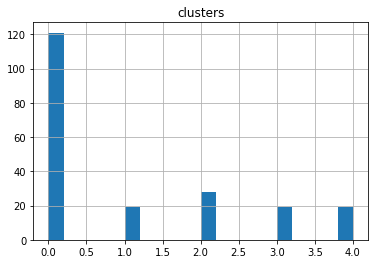

In [4]:
# Leitura dos labels - Veio 4
df_cls2=pd.read_csv('./data/clusters_Strand4_new.csv',index_col=0)
void=df_cls2.hist(bins=20)

C:\Users\leandro\Anaconda3\envs\IFES\lib\site-packages\pandas\plotting\_core.py:304: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



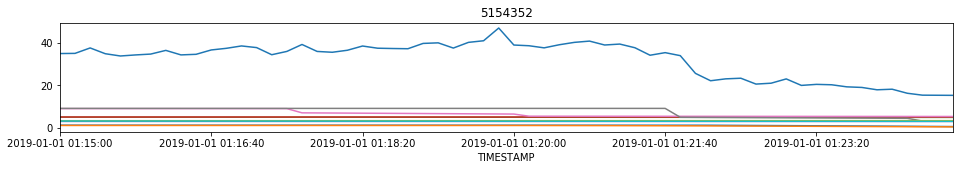

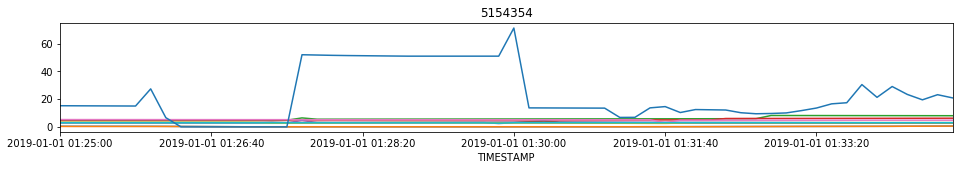

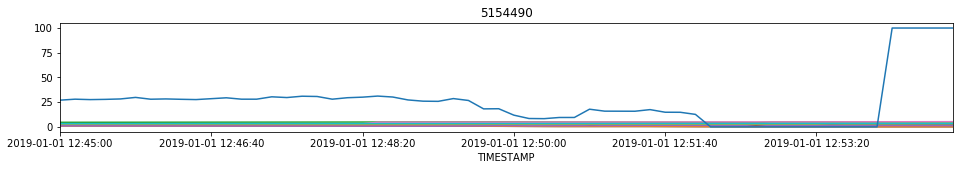

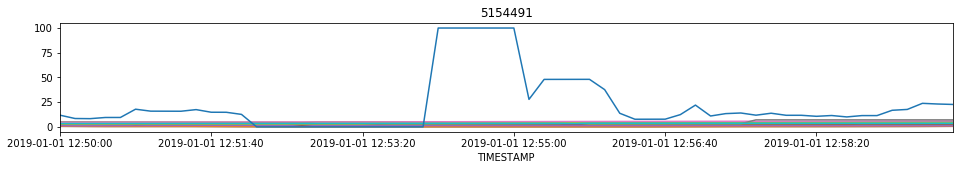

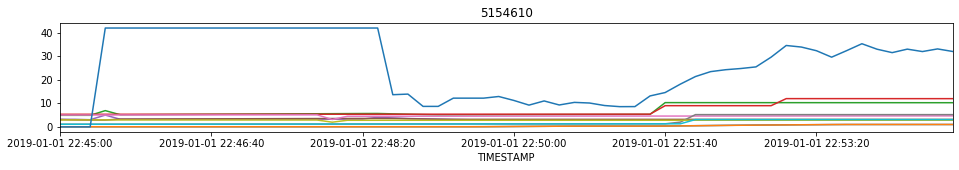

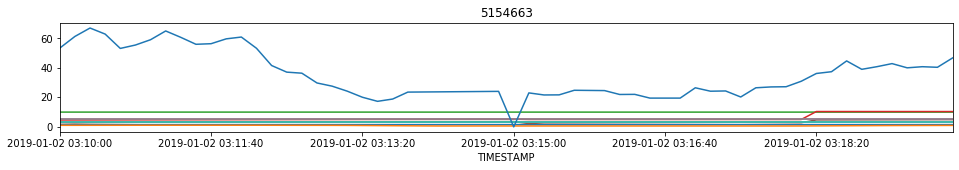

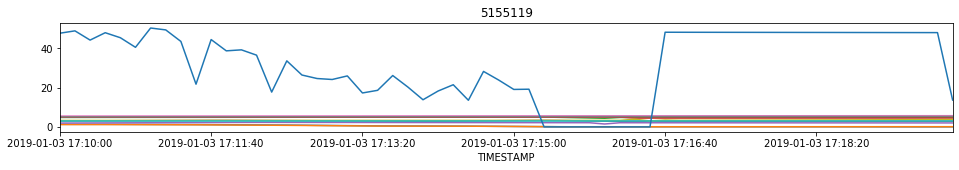

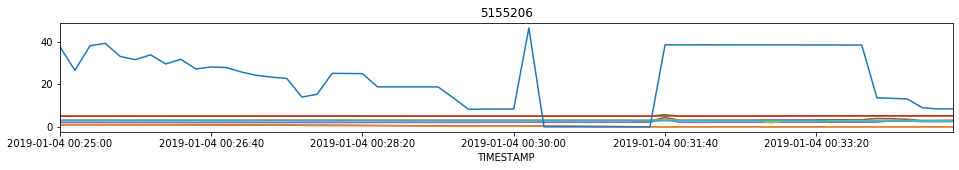

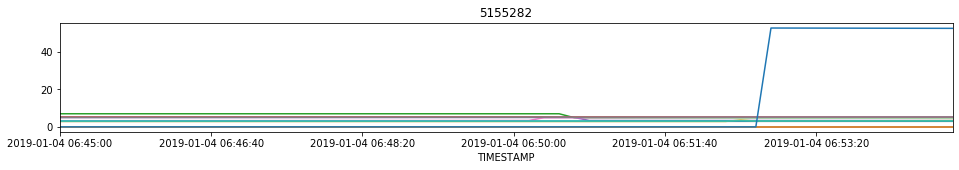

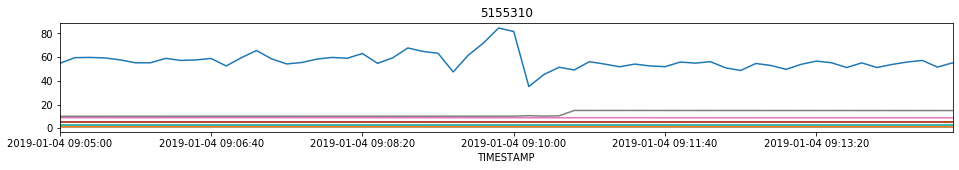

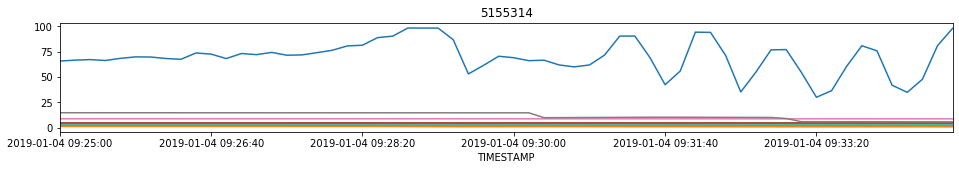

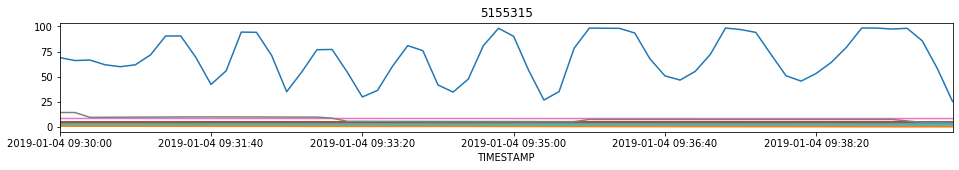

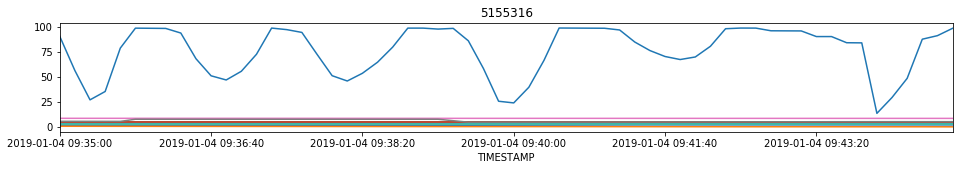

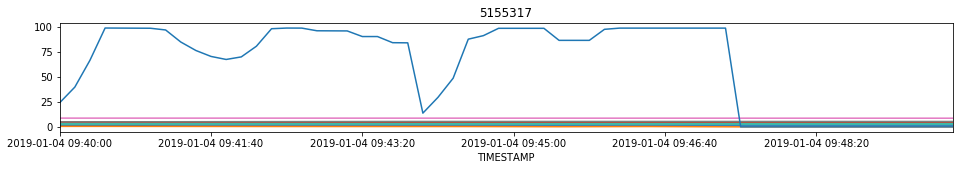

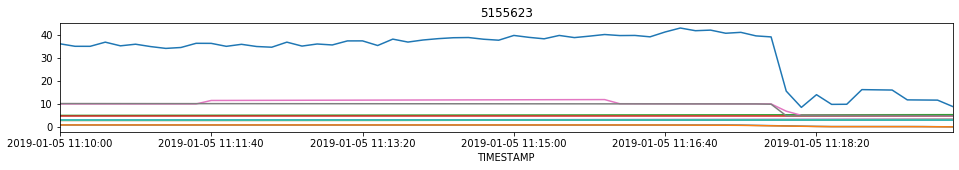

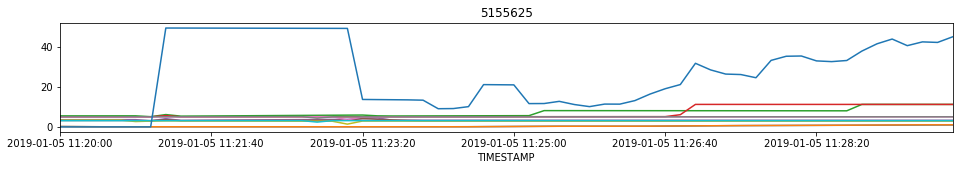

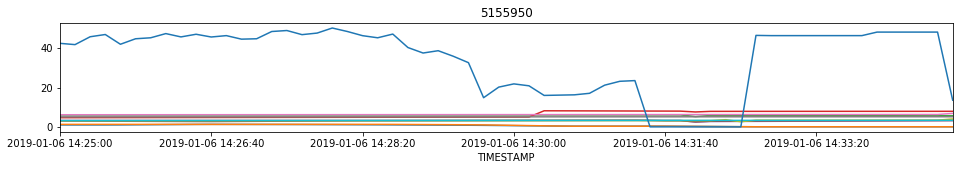

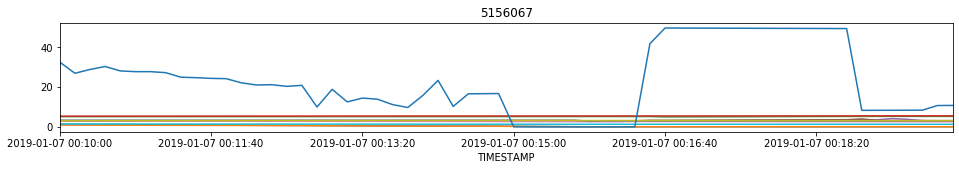

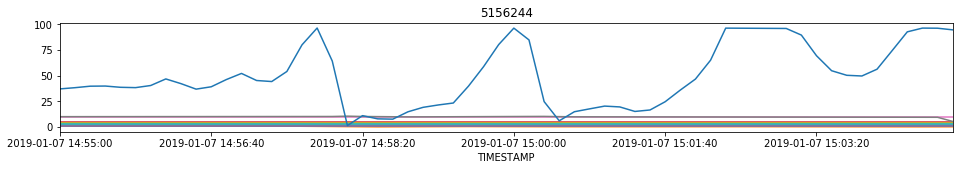

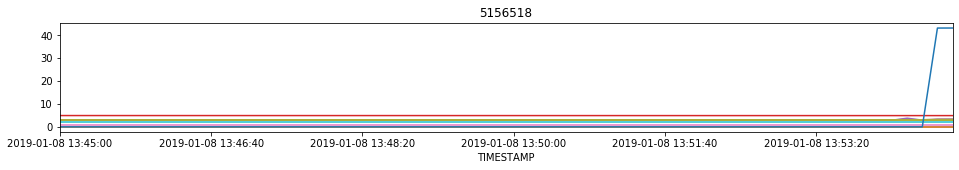

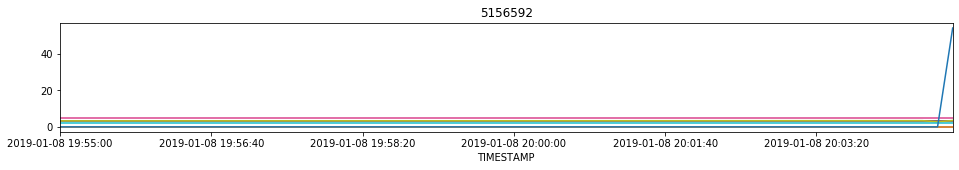

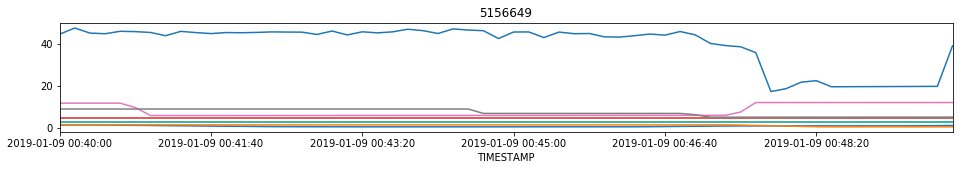

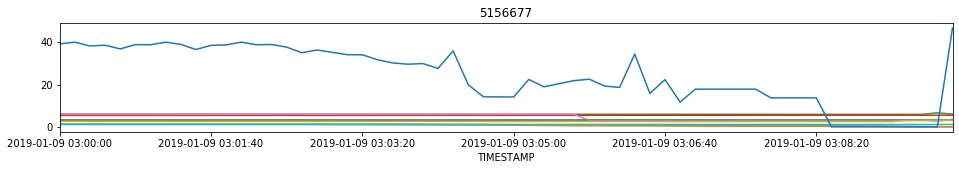

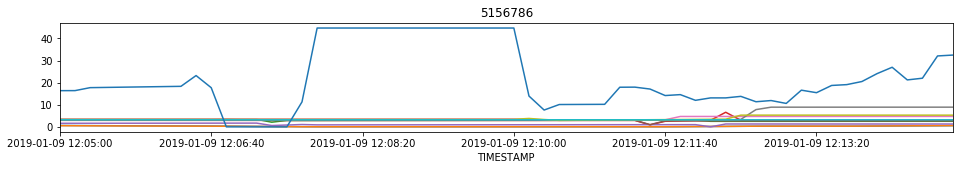

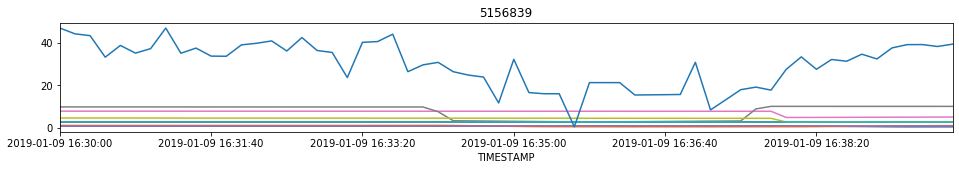

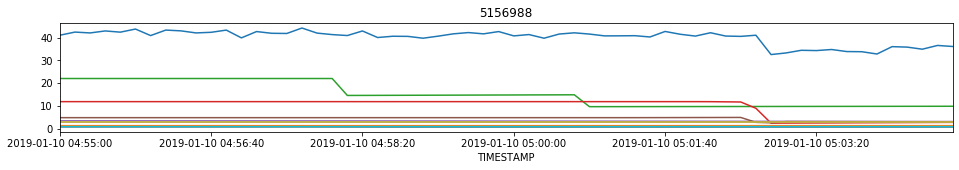

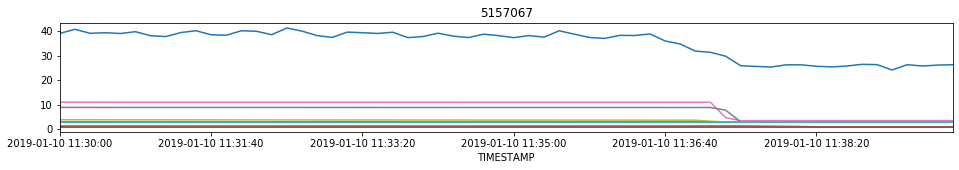

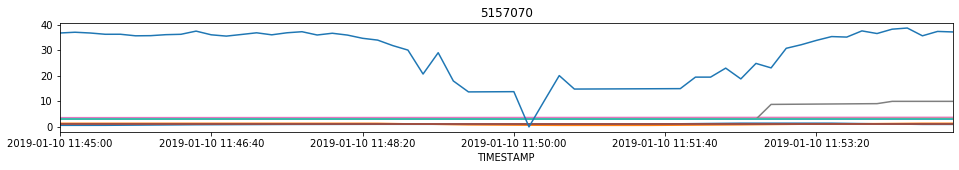

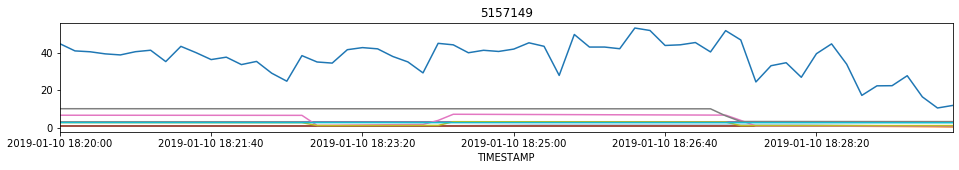

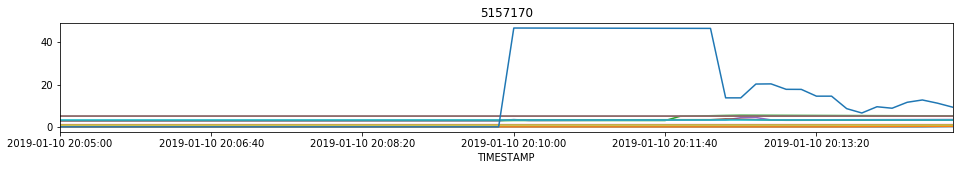

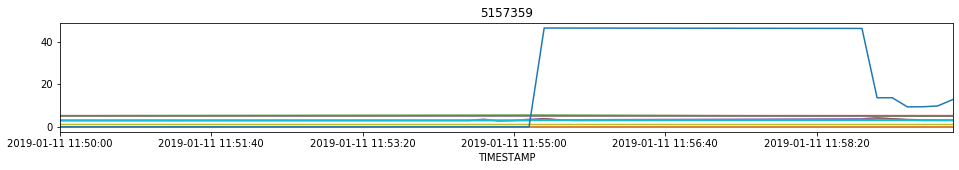

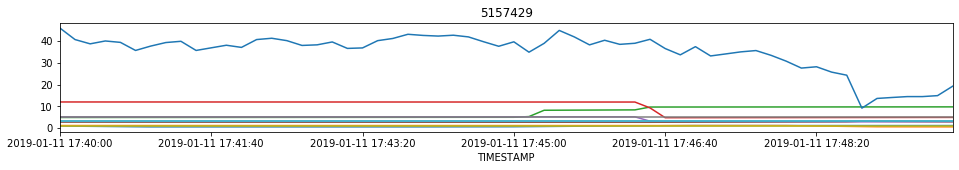

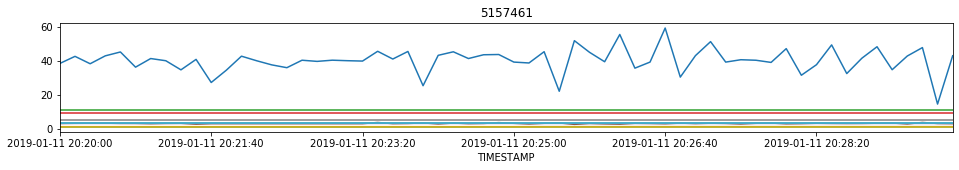

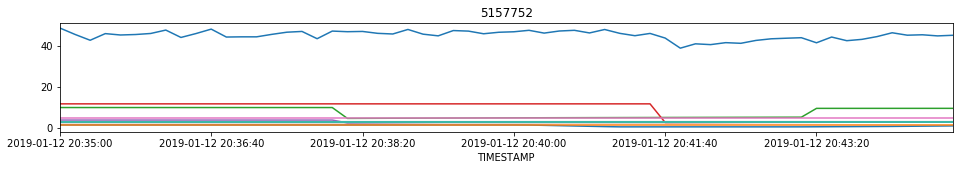

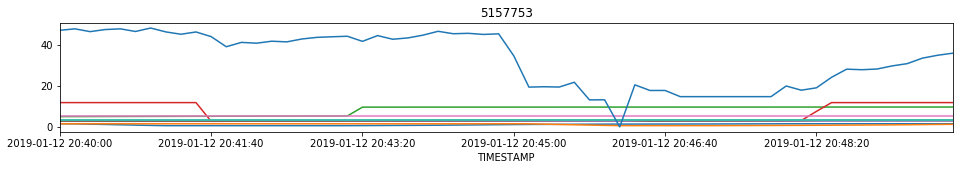

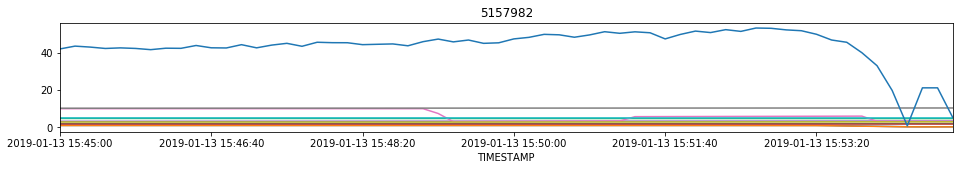

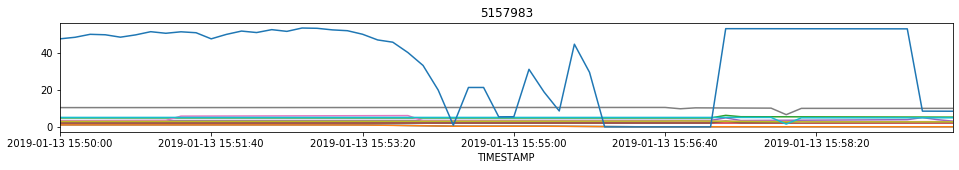

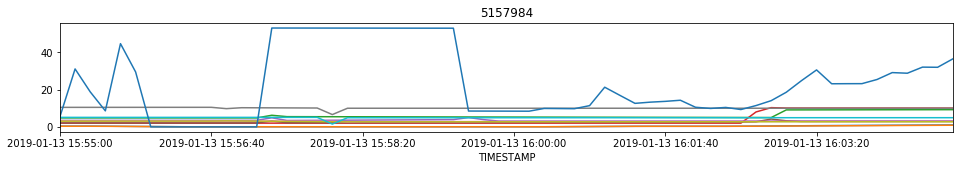

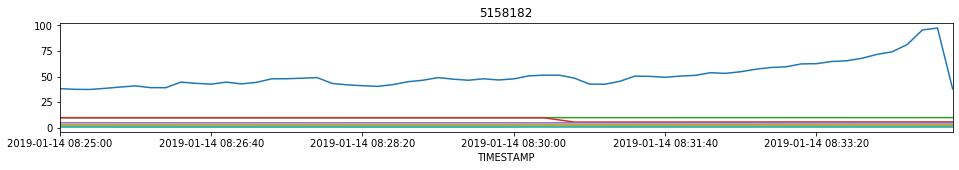

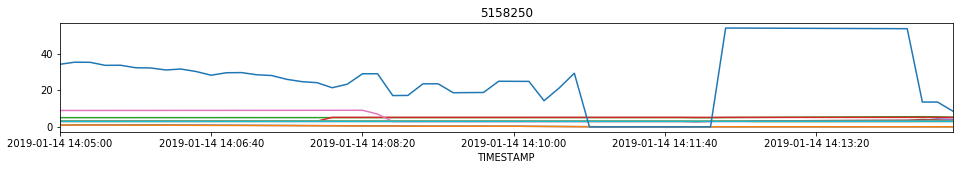

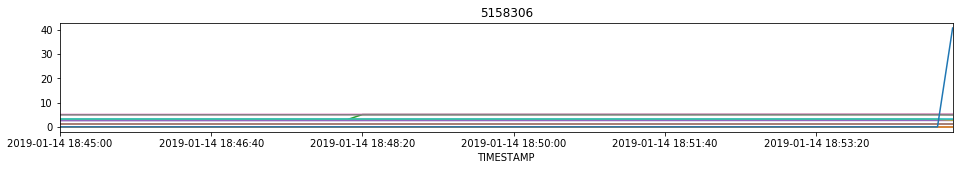

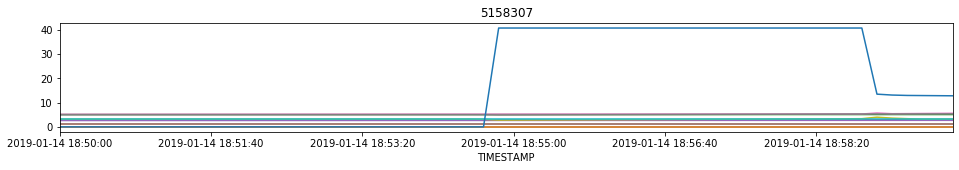

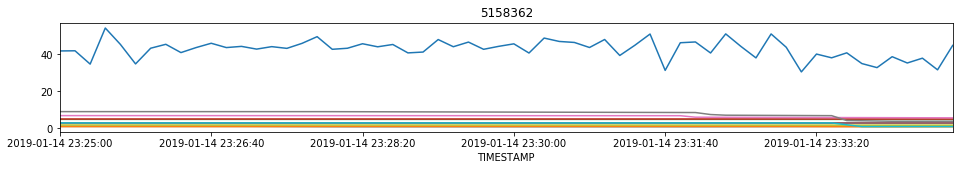

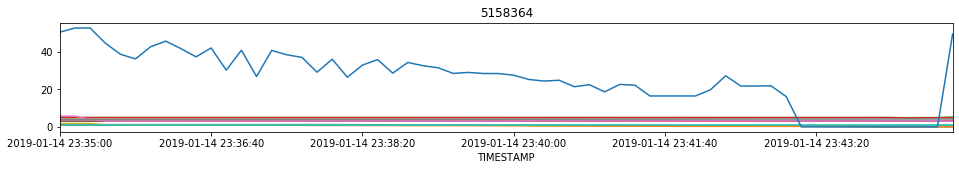

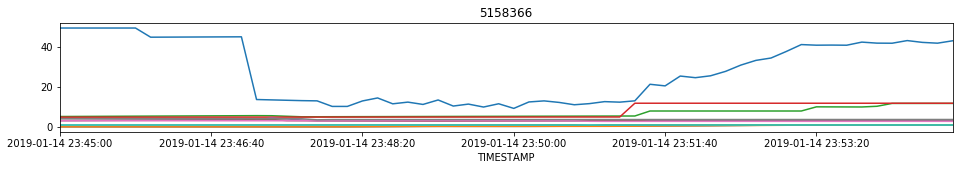

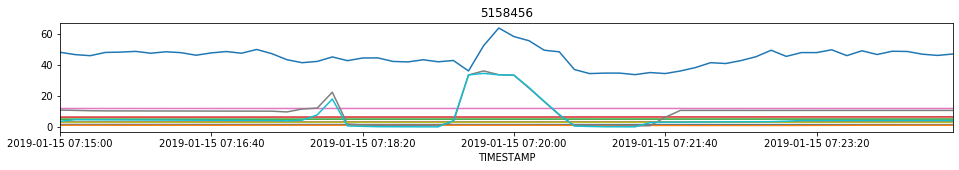

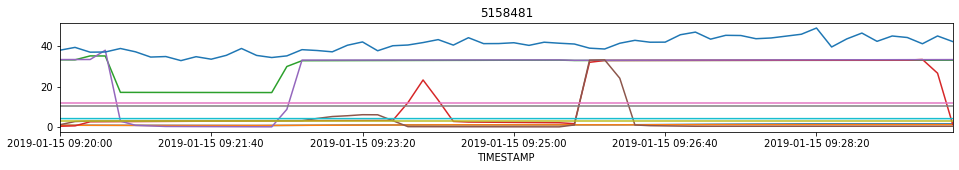

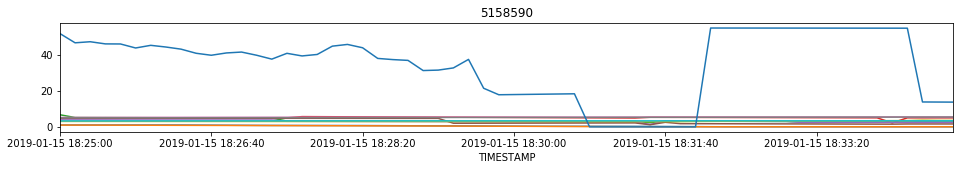

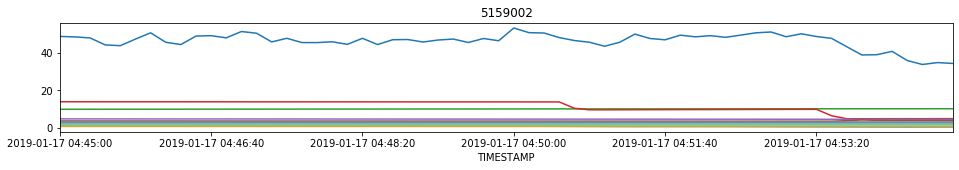

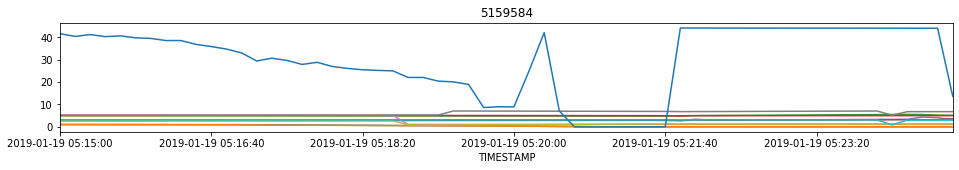

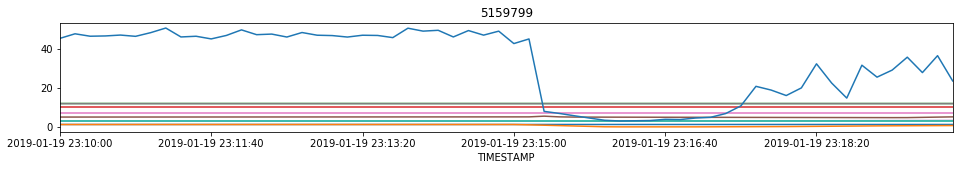

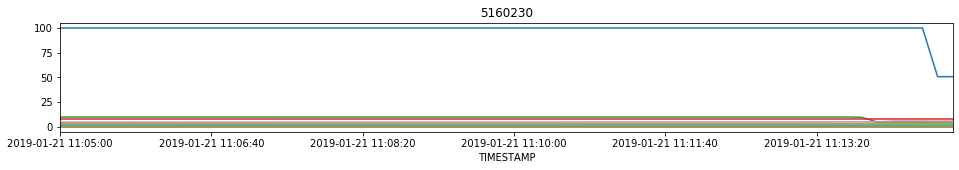

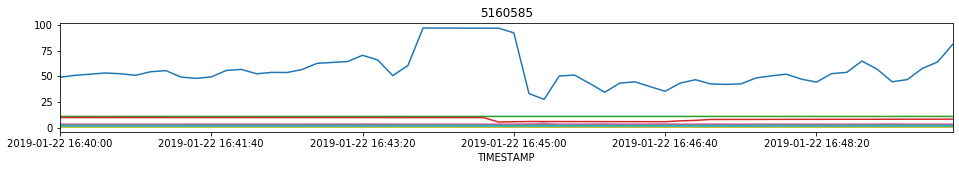

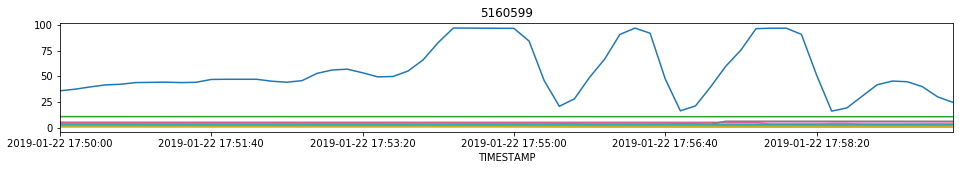

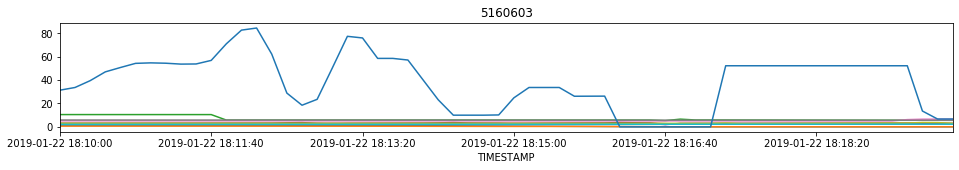

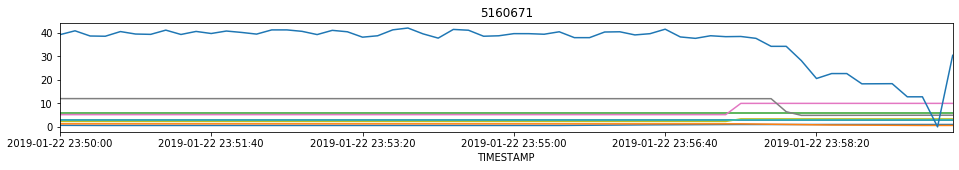

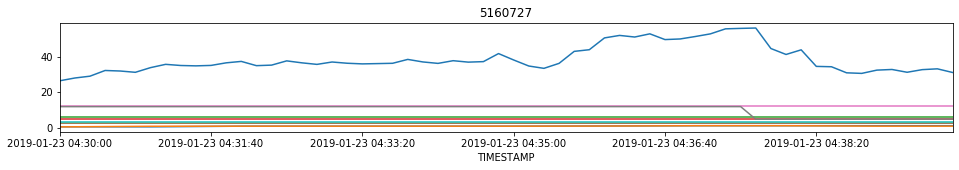

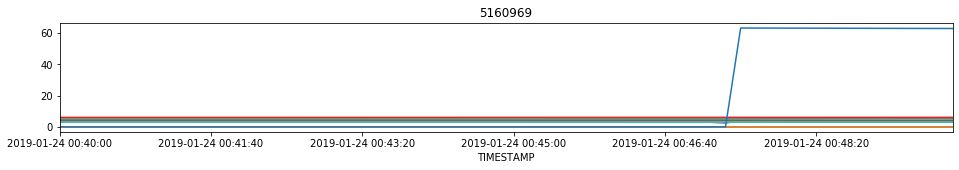

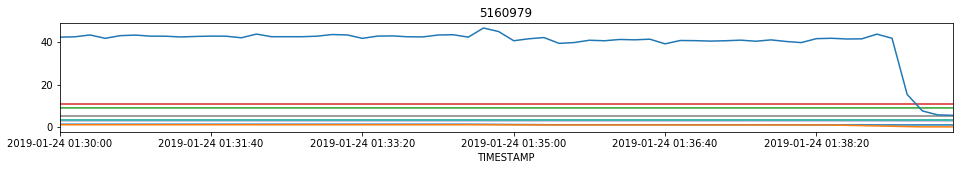

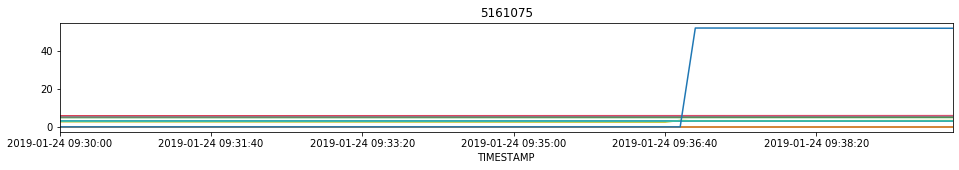

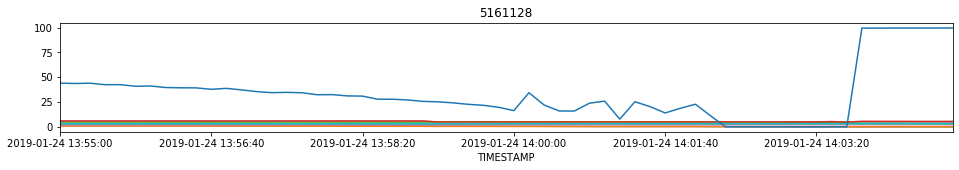

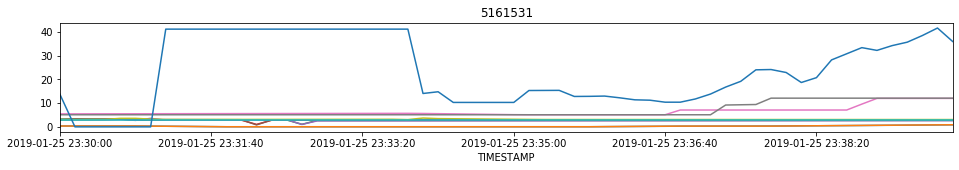

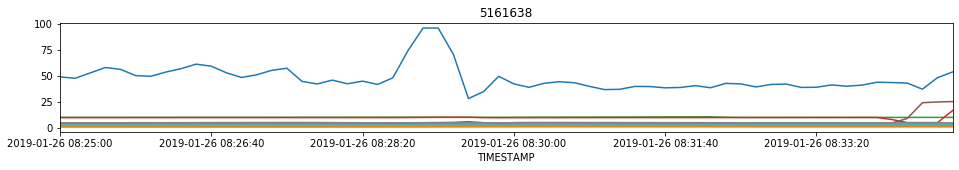

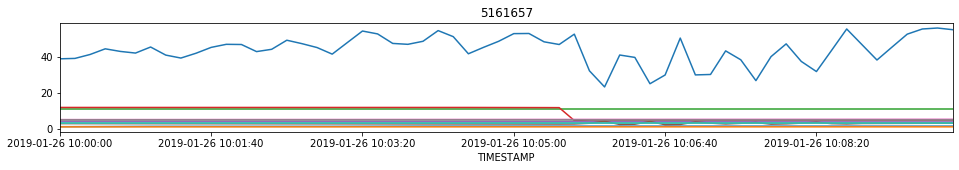

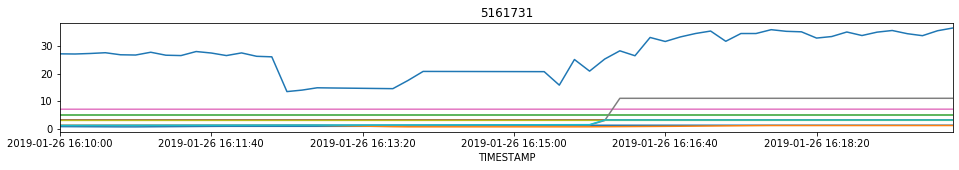

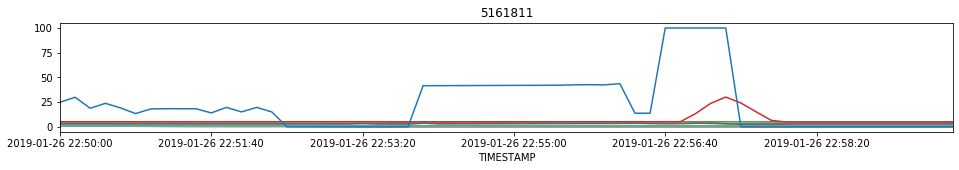

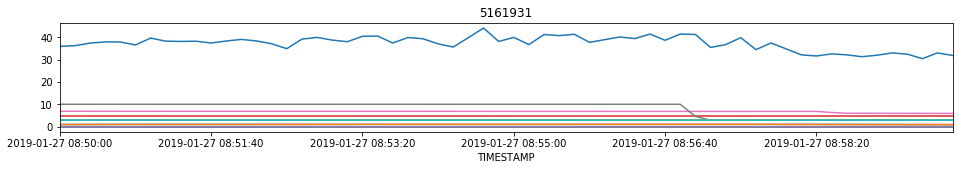

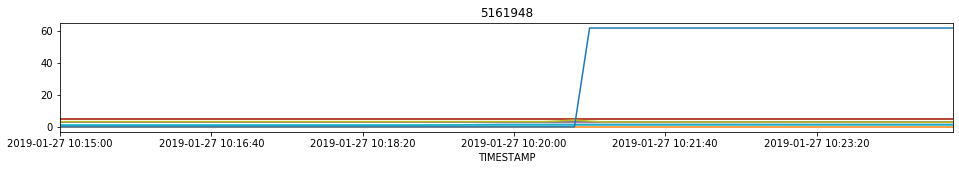

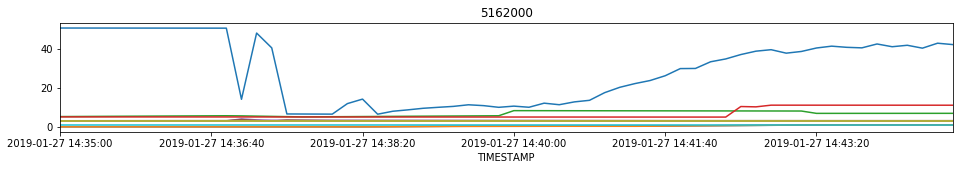

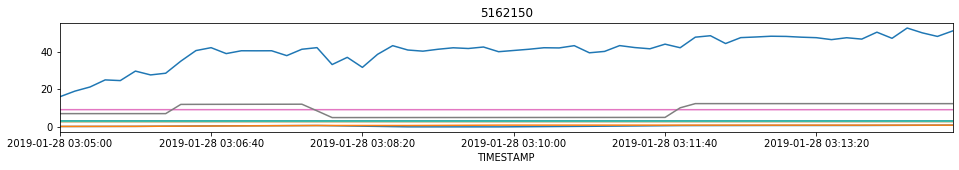

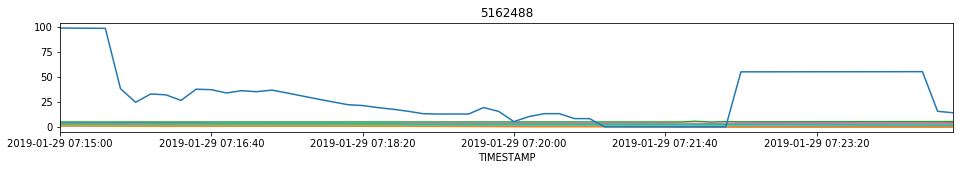

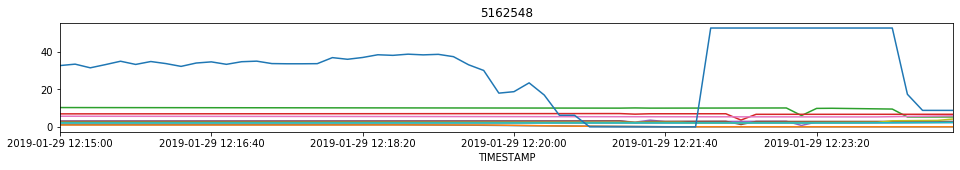

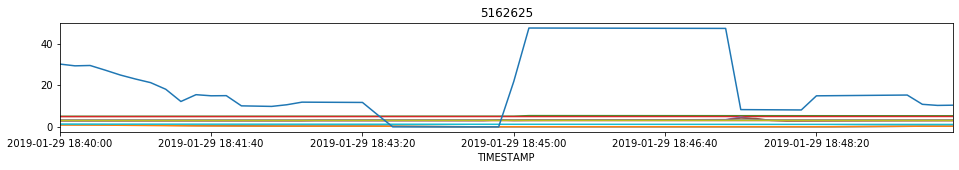

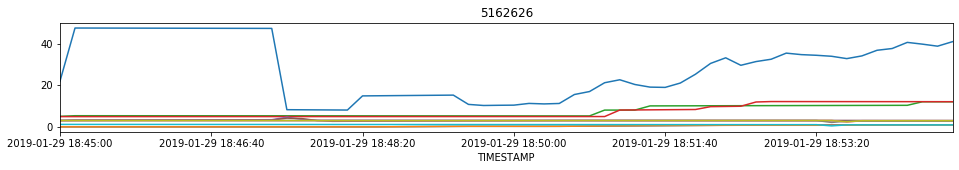

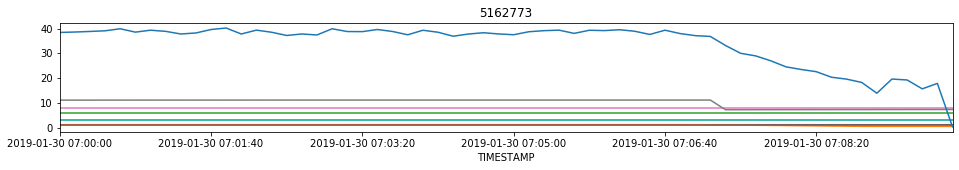

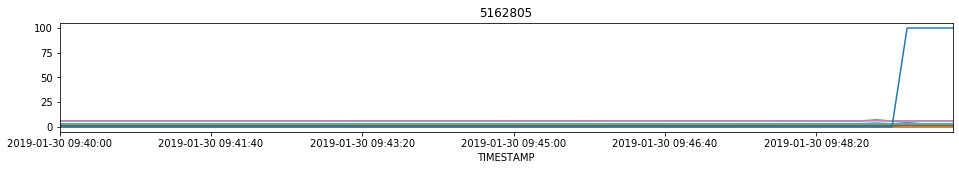

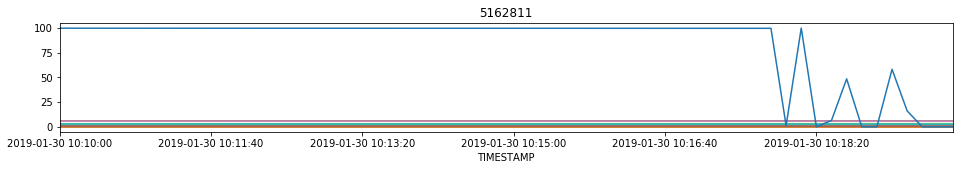

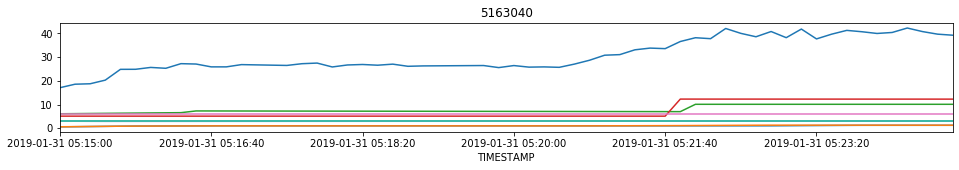

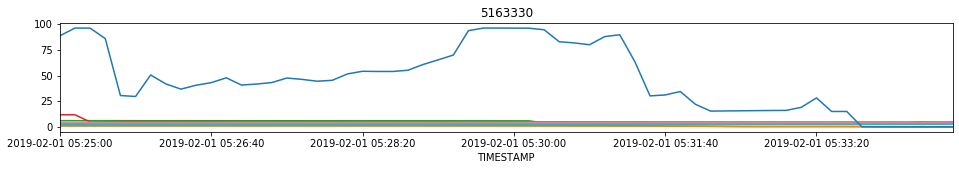

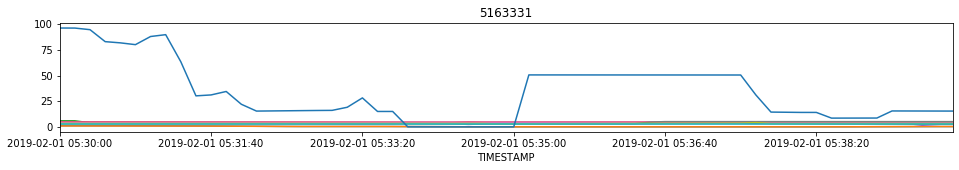

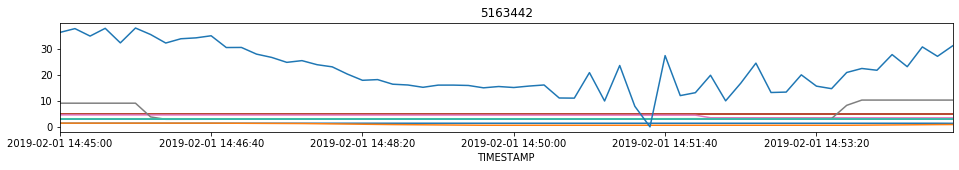

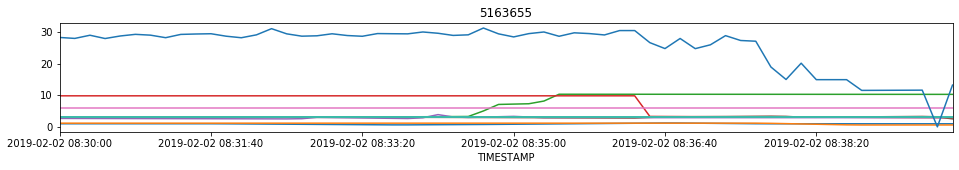

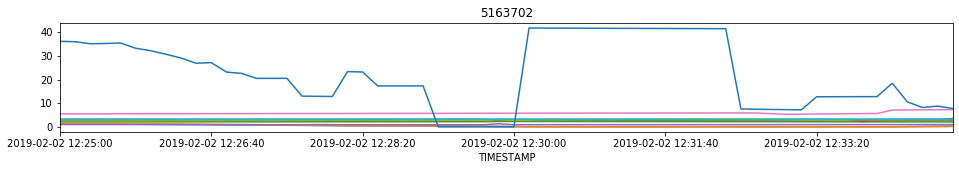

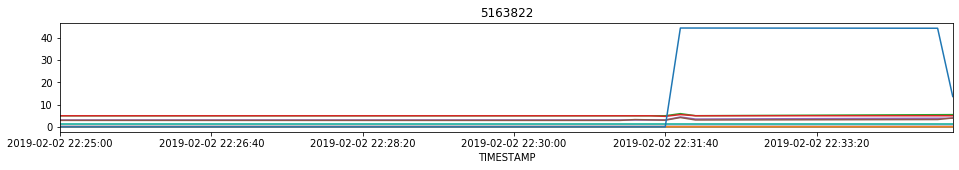

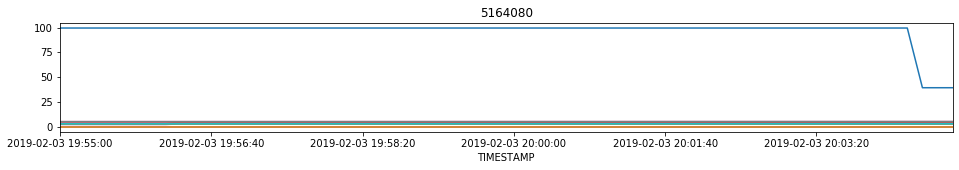

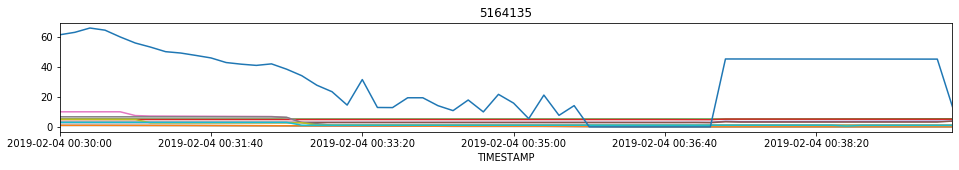

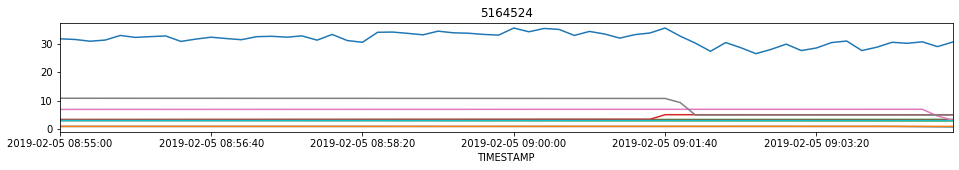

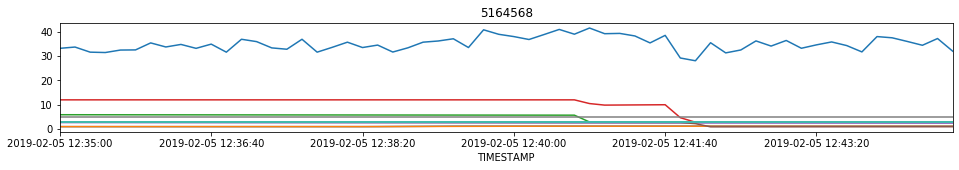

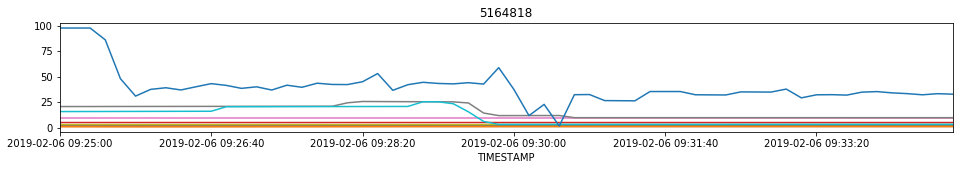

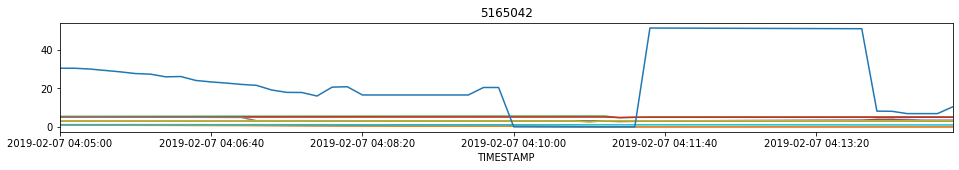

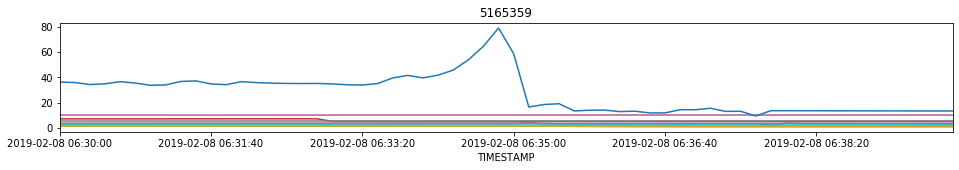

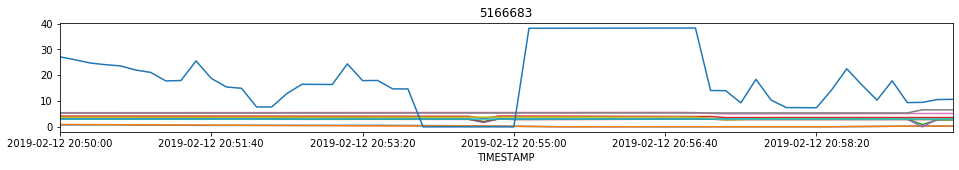

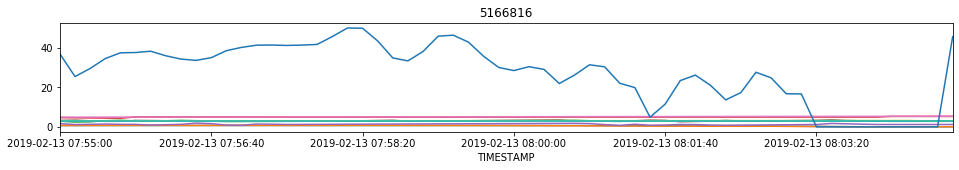

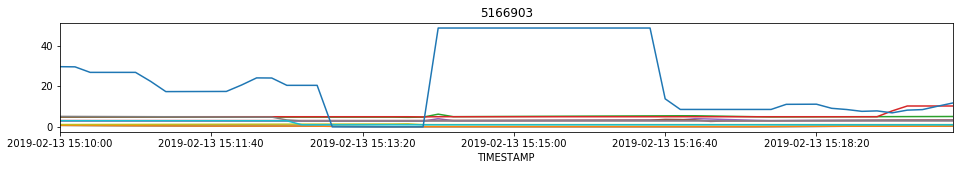

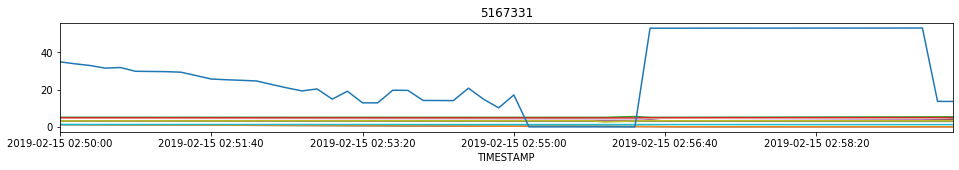

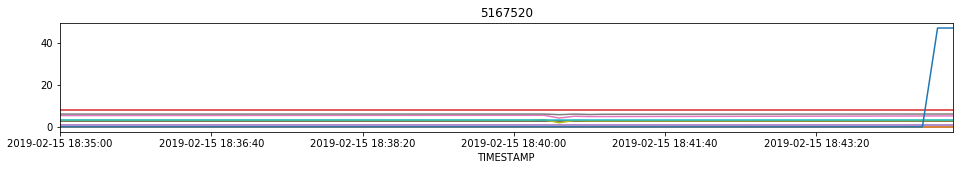

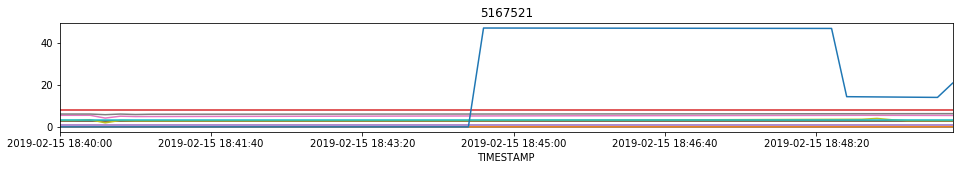

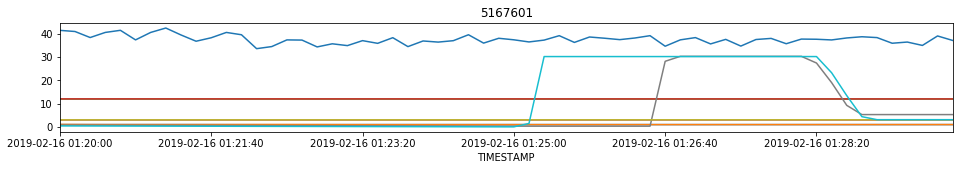

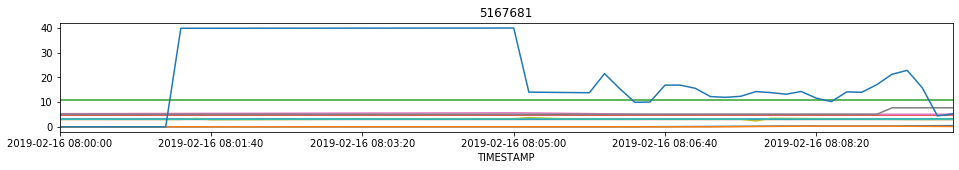

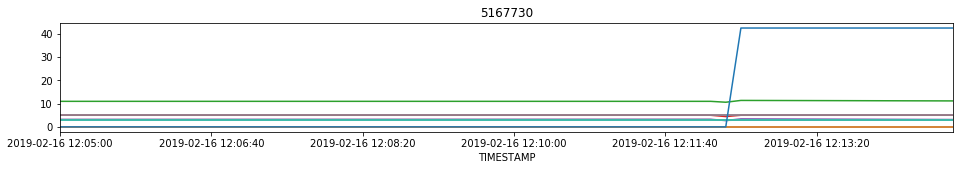

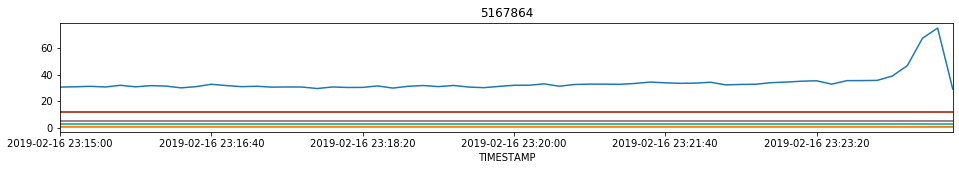

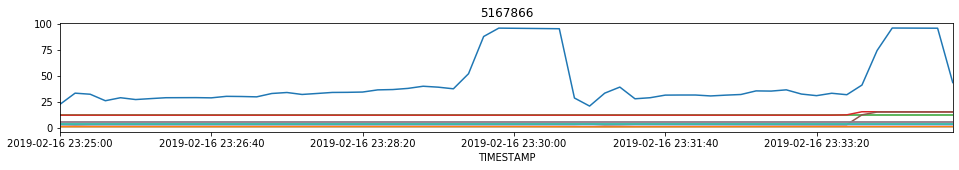

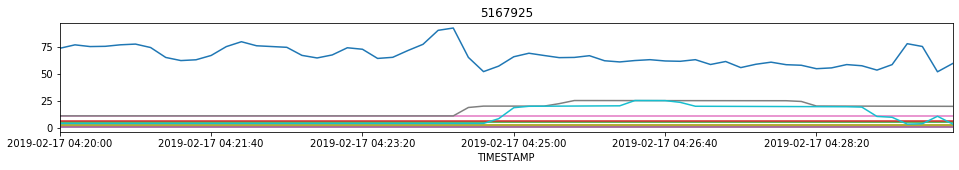

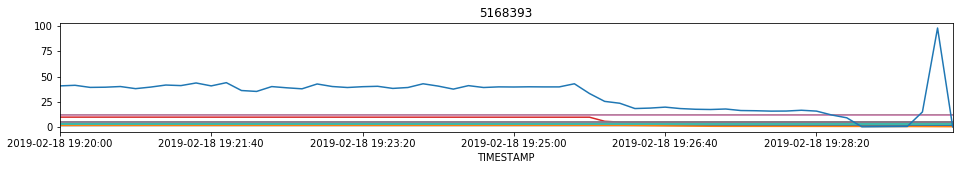

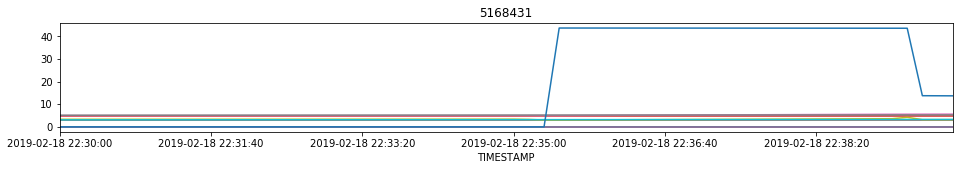

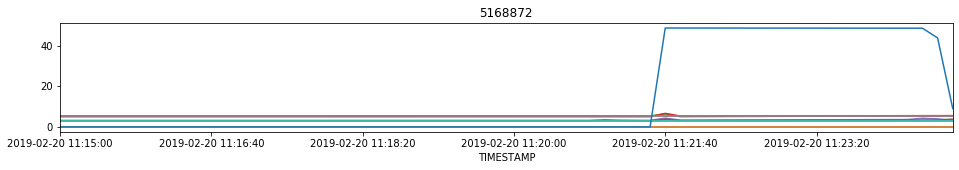

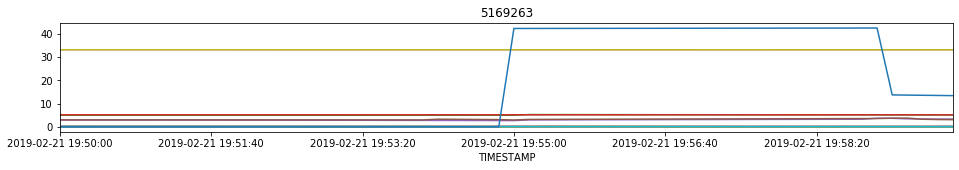

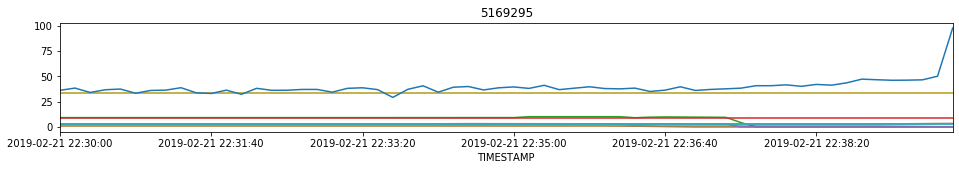

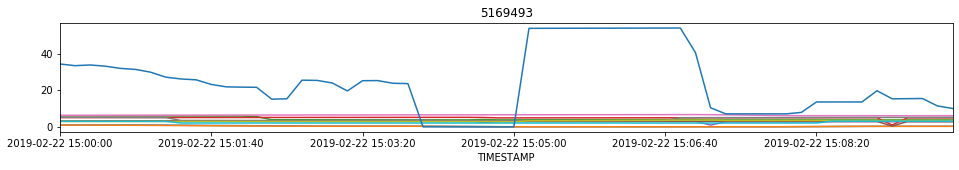

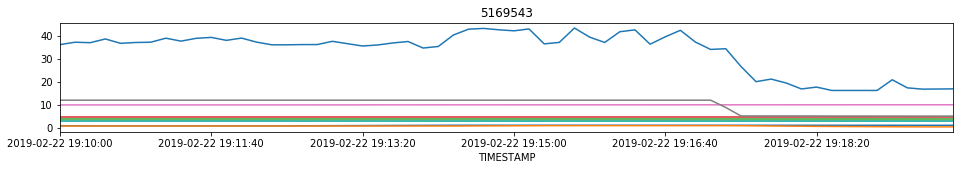

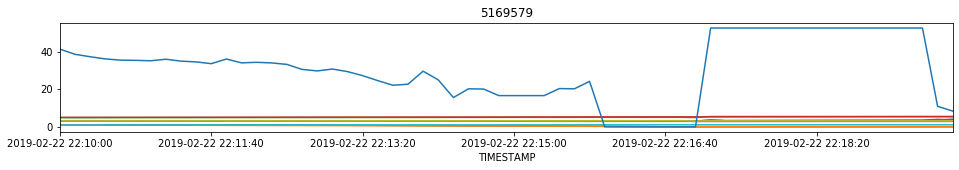

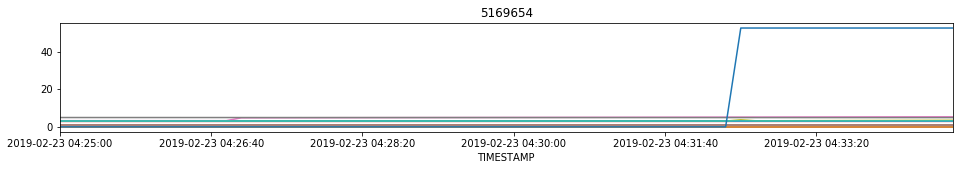

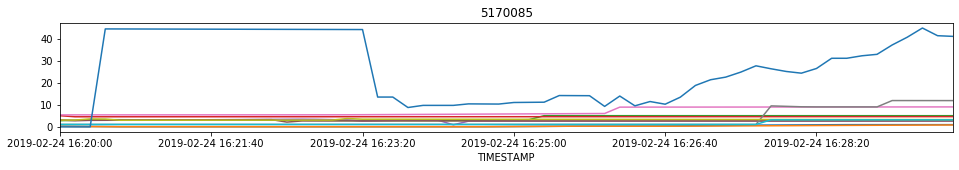

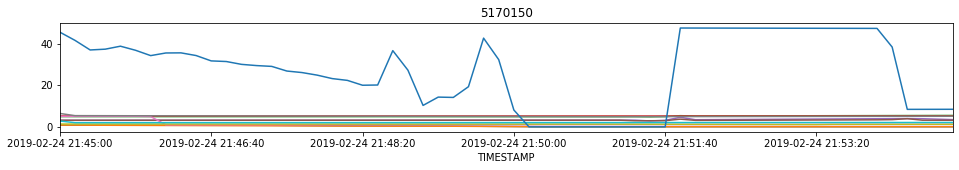

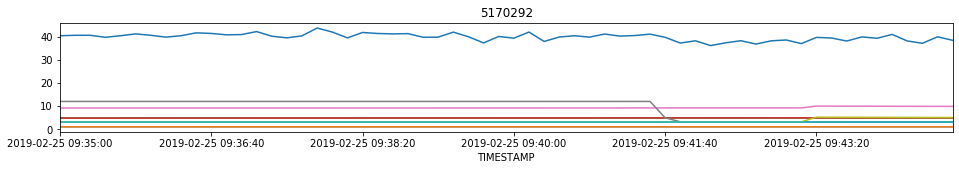

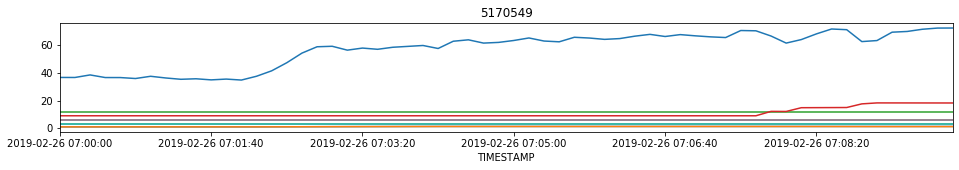

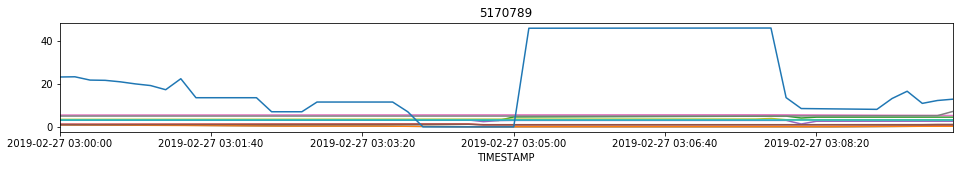

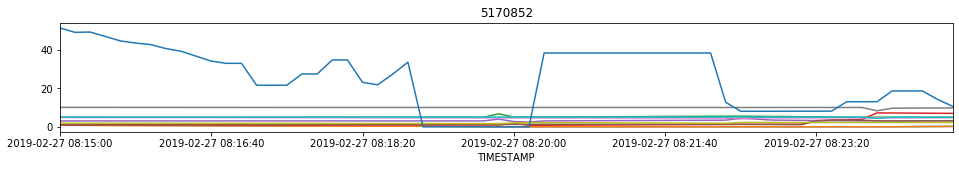

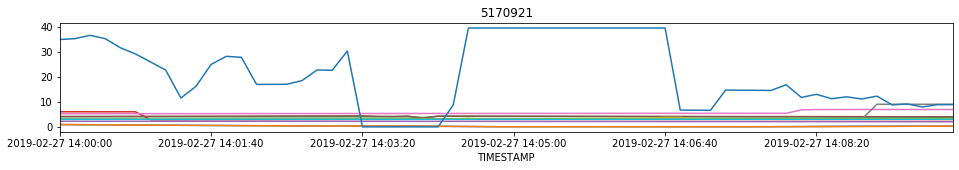

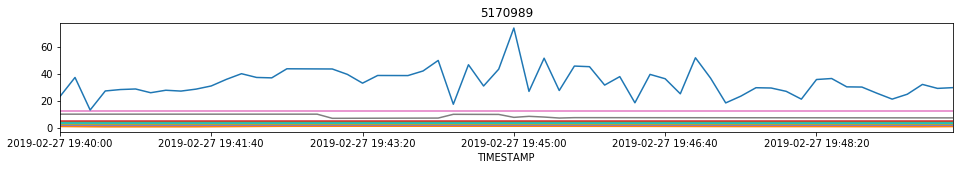

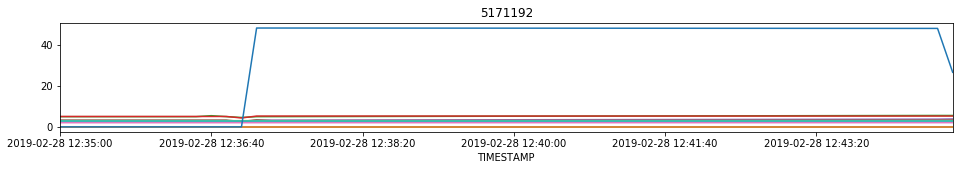

In [5]:
cls=0
filter=list(df_cls2.loc[df_cls2.clusters==cls].index)
for w in filter:
    df_ts.loc[df_ts.id.isin([w-1,w])].drop(['id']+TAGListVAL_v3,axis=1).plot(figsize=(16,2),title=w,legend=False)

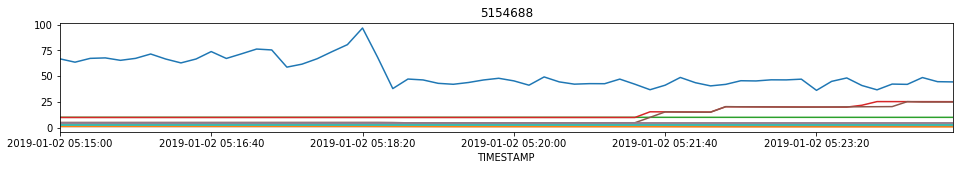

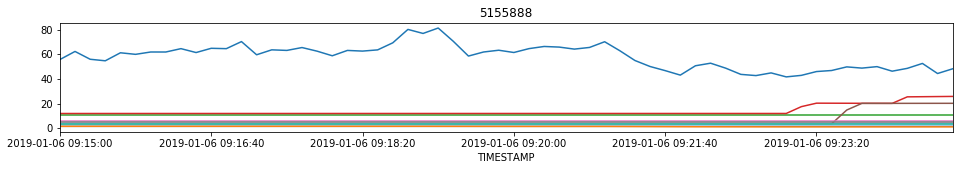

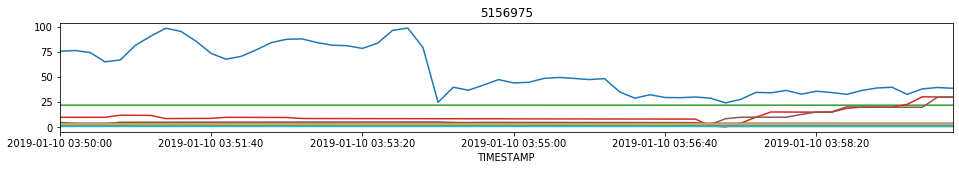

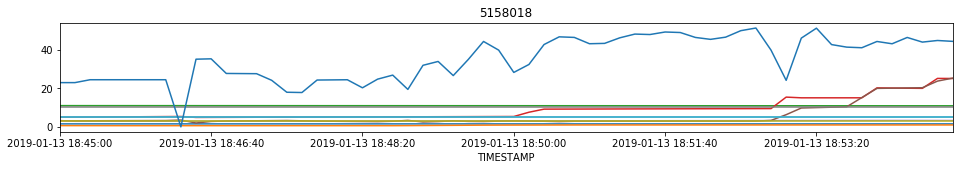

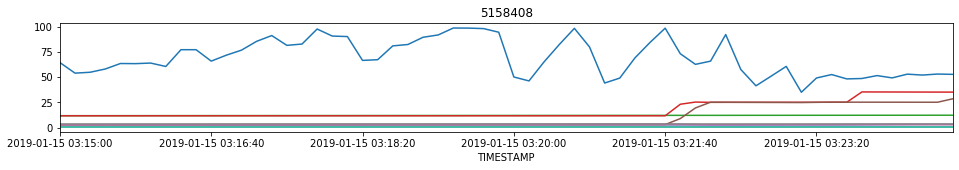

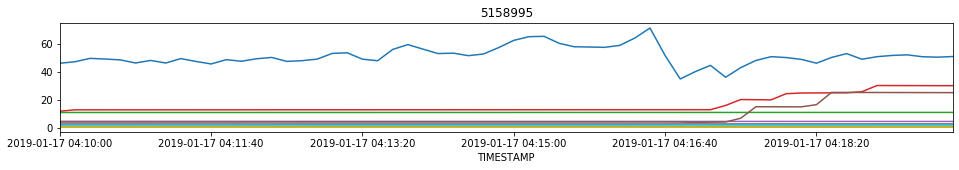

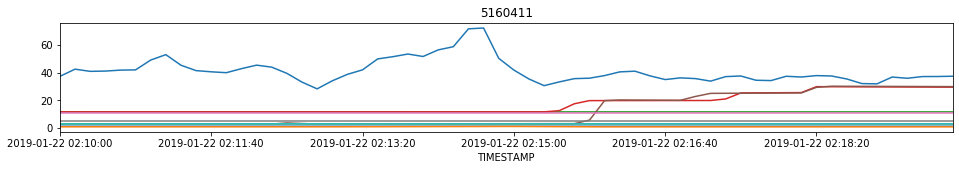

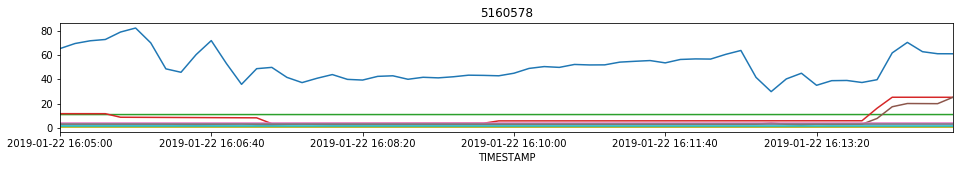

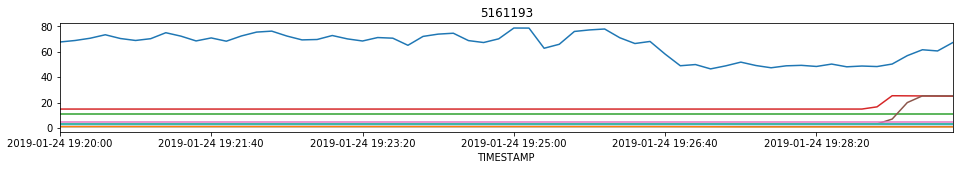

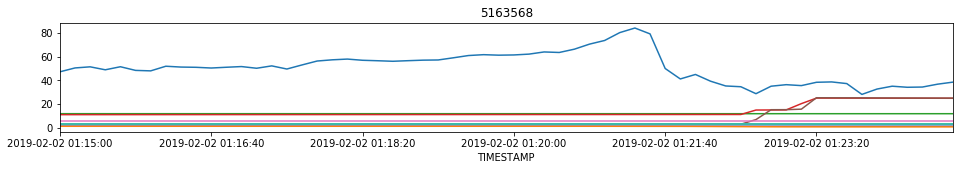

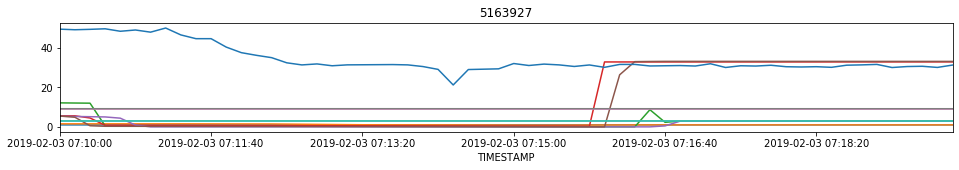

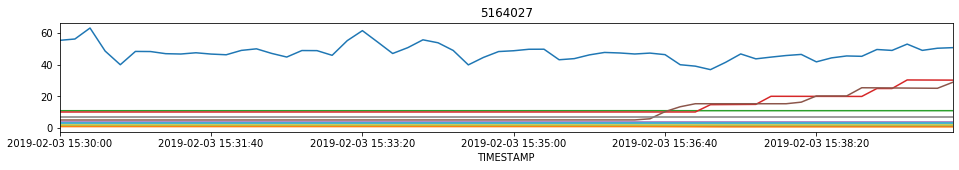

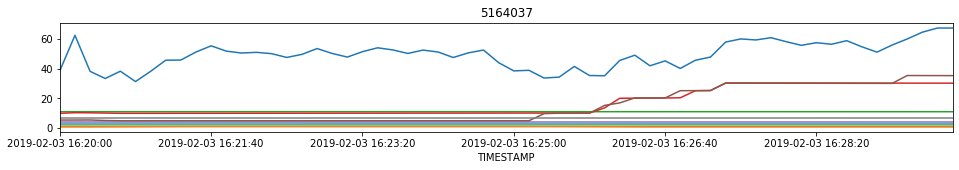

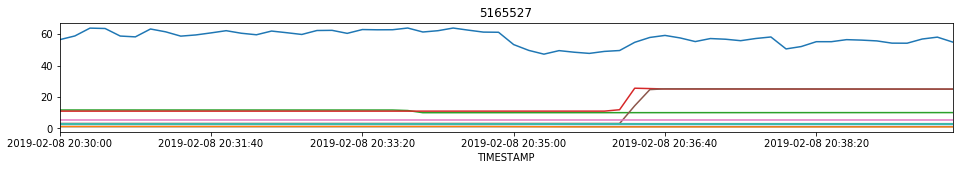

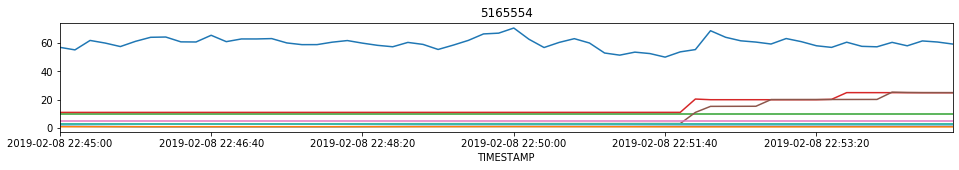

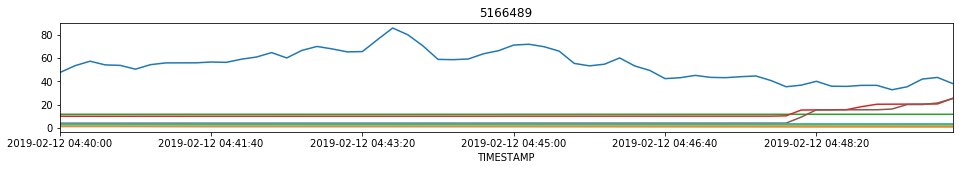

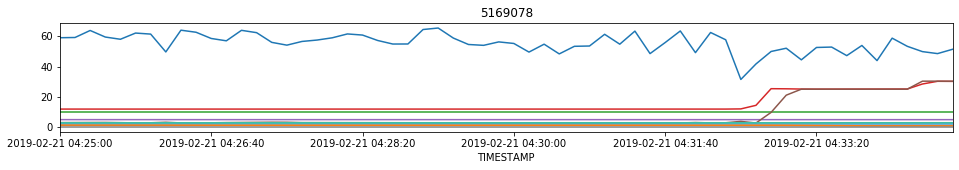

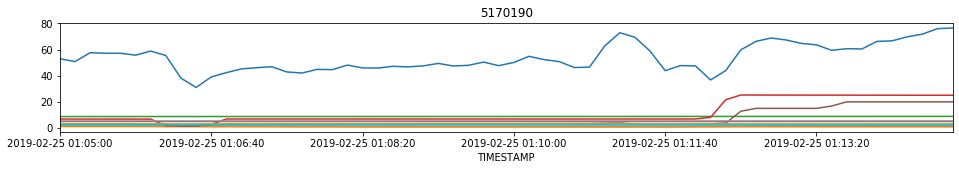

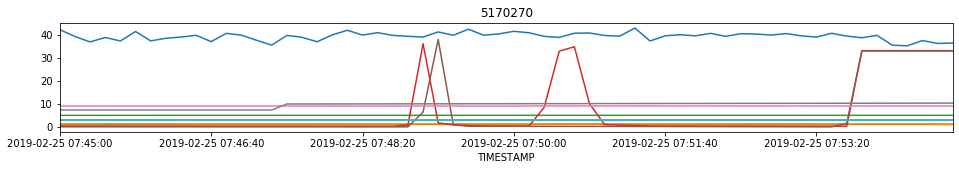

In [6]:
cls=1
filter=list(df_cls2.loc[df_cls2.clusters==cls].index)
for w in filter:
    df_ts.loc[df_ts.id.isin([w-1,w])].drop(['id']+TAGListVAL_v3,axis=1).plot(figsize=(16,2),title=w,legend=False)

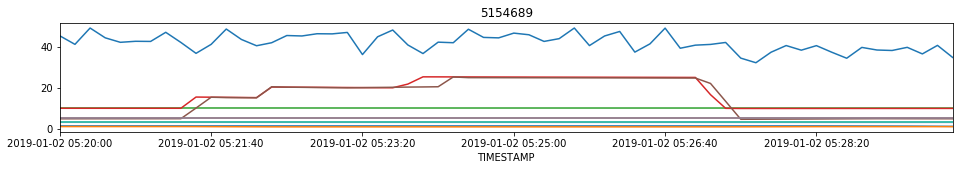

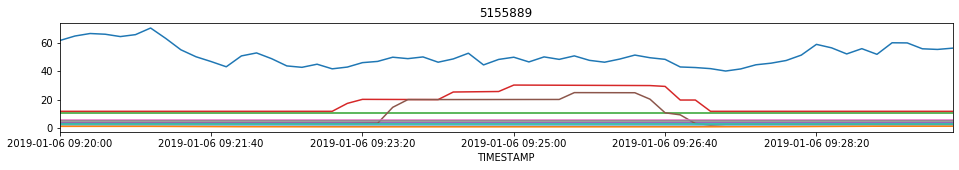

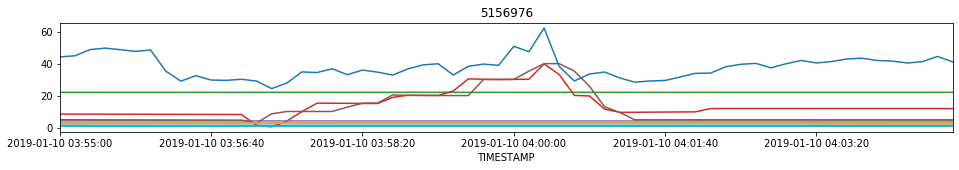

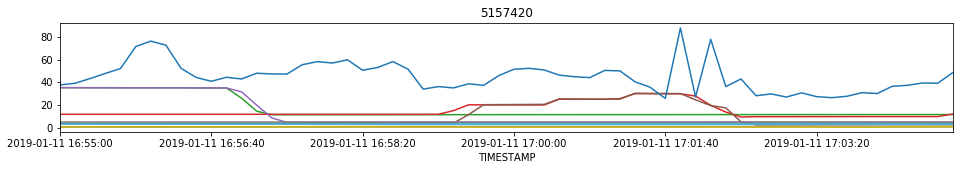

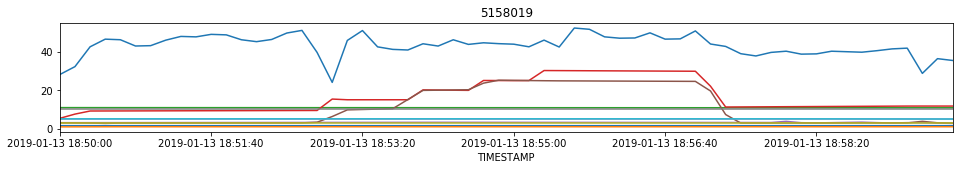

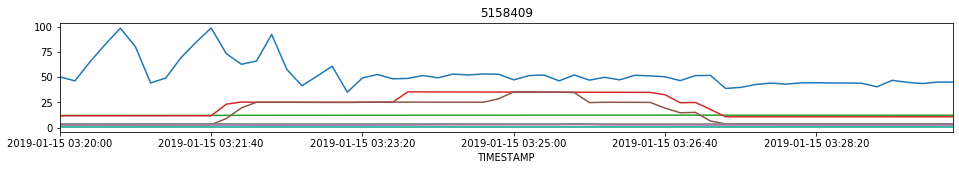

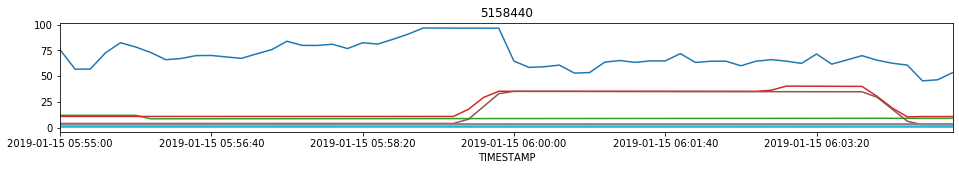

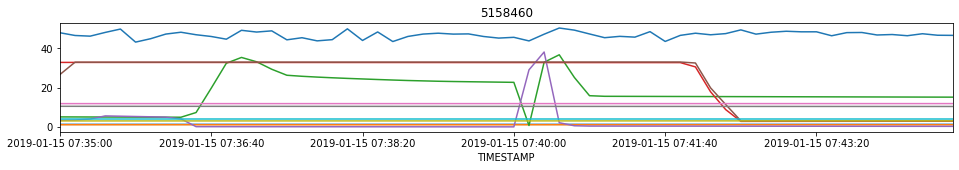

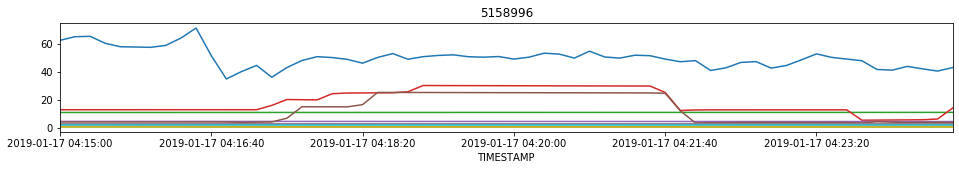

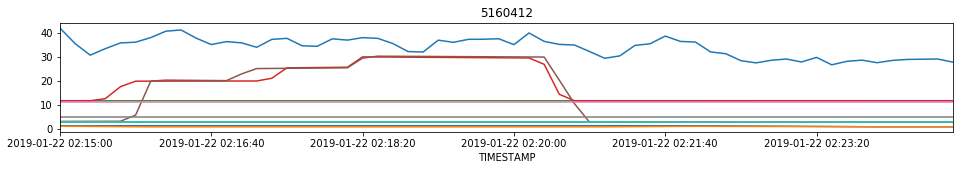

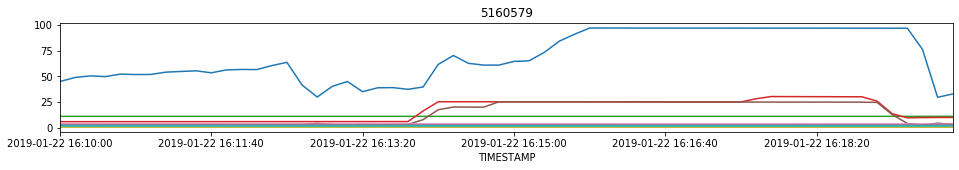

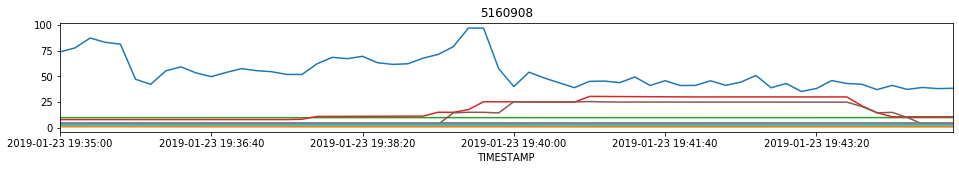

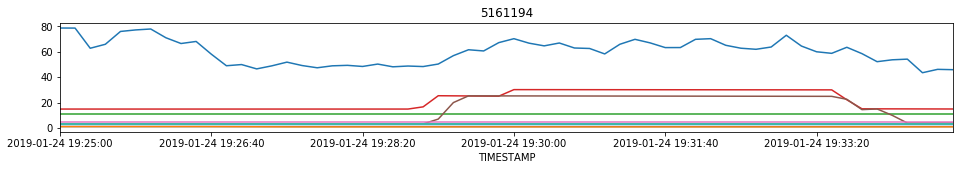

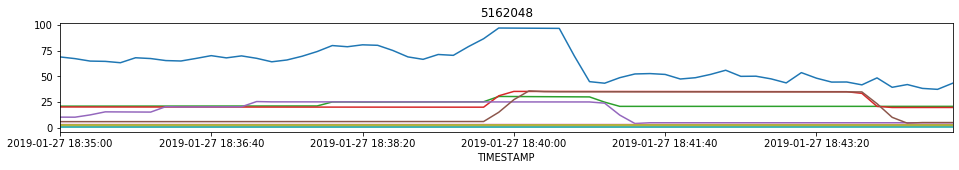

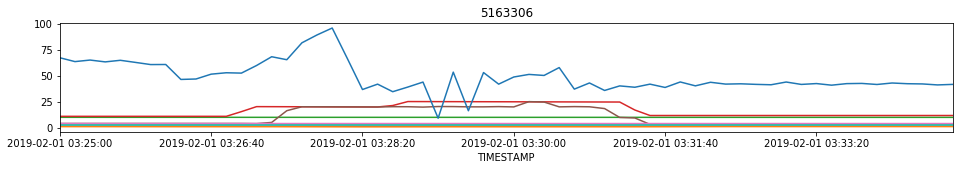

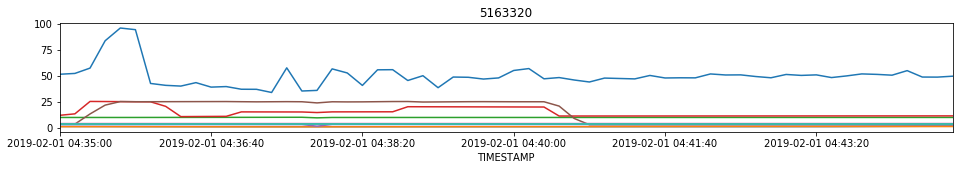

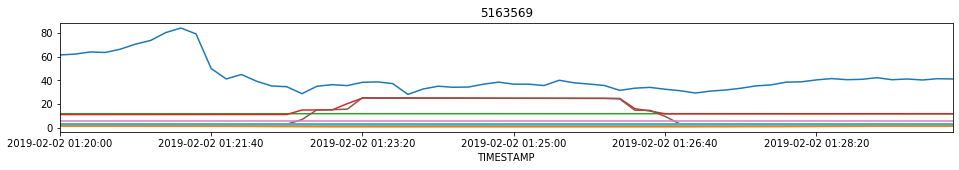

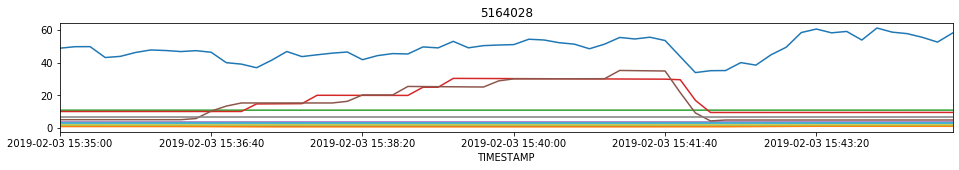

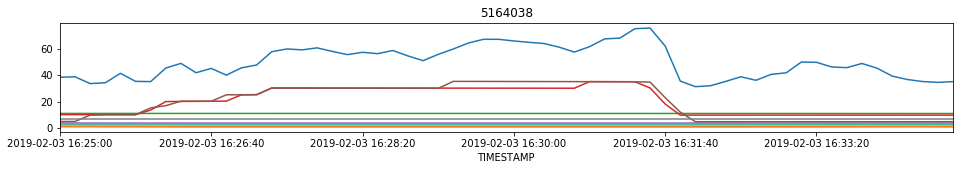

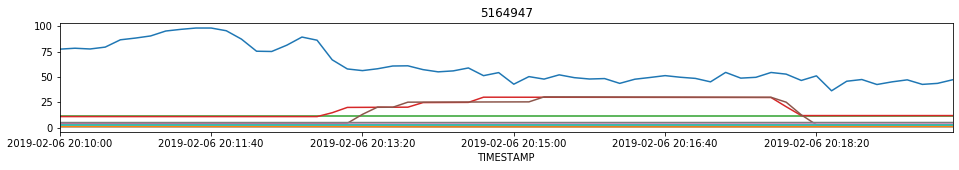

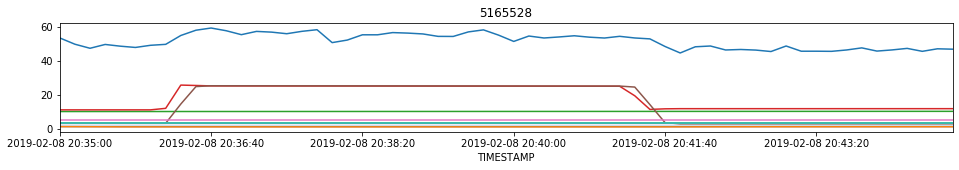

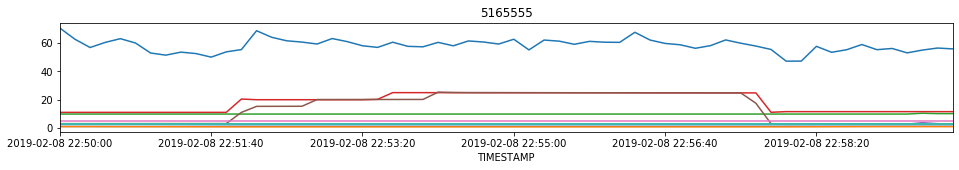

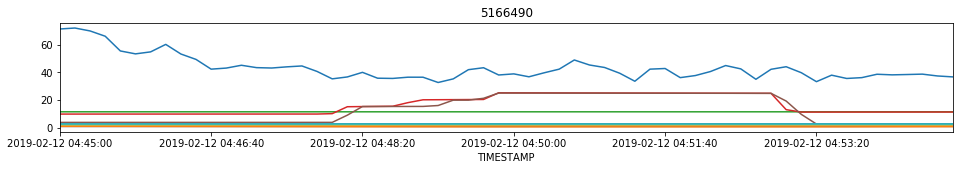

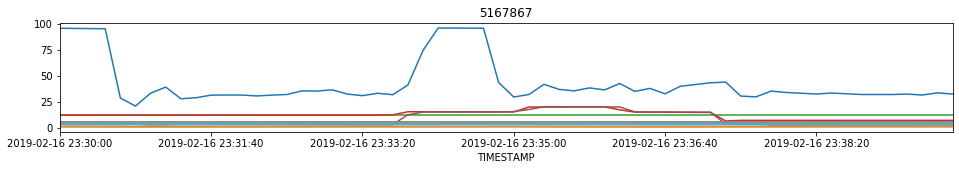

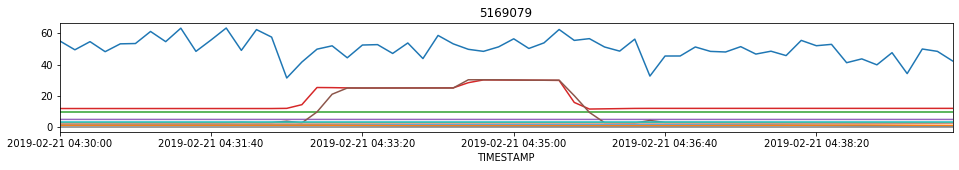

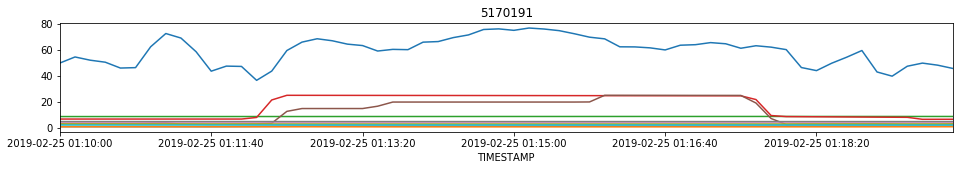

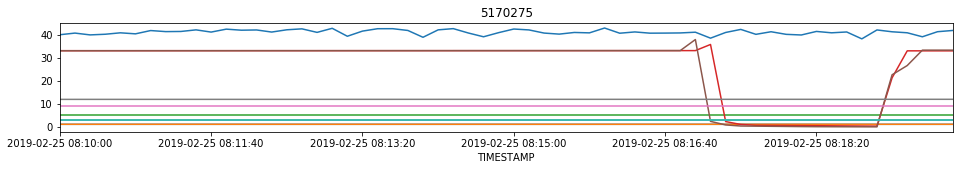

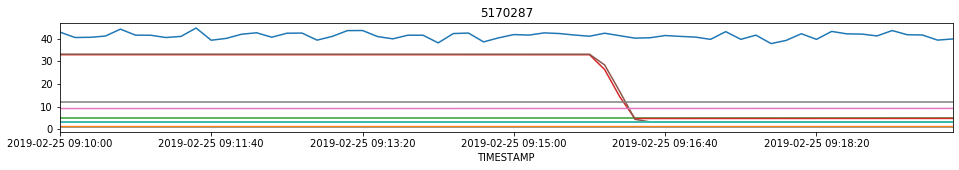

In [7]:
# Retorno de processo
cls=2
filter=list(df_cls2.loc[df_cls2.clusters==cls].index)
for w in filter:
    df_ts.loc[df_ts.id.isin([w-1,w])].drop(['id']+TAGListVAL_v3,axis=1).plot(figsize=(16,2),title=w,legend=False)

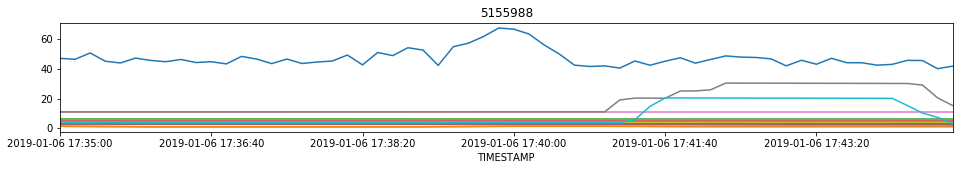

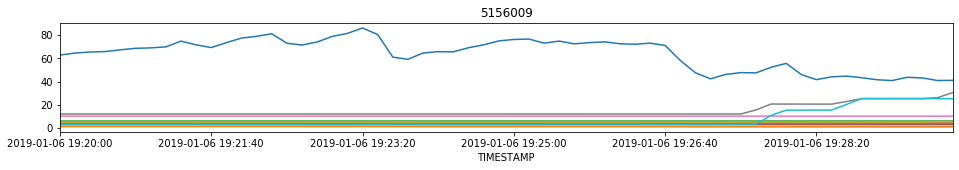

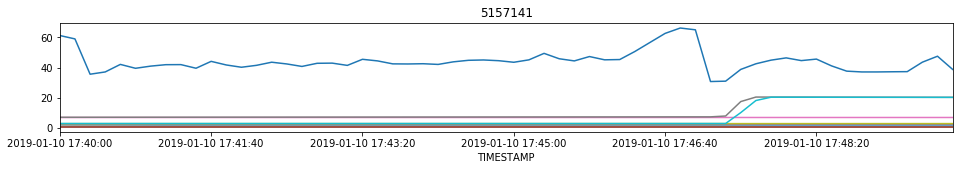

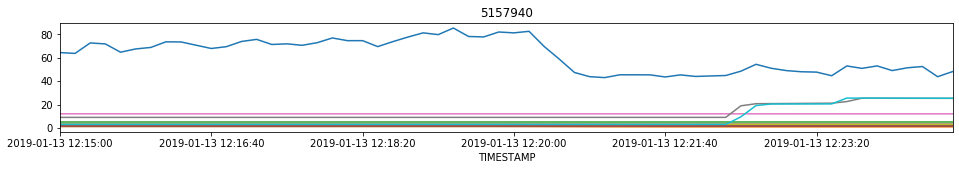

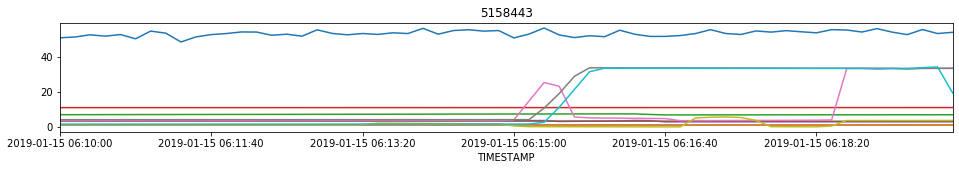

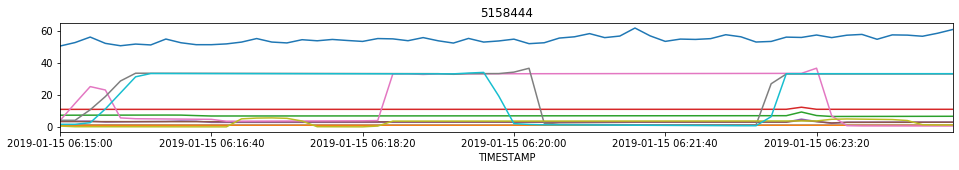

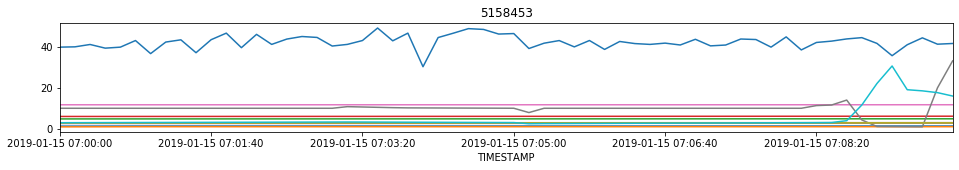

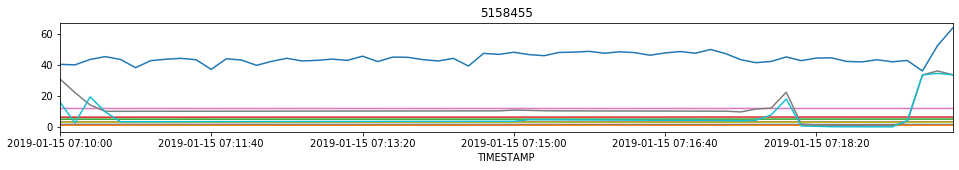

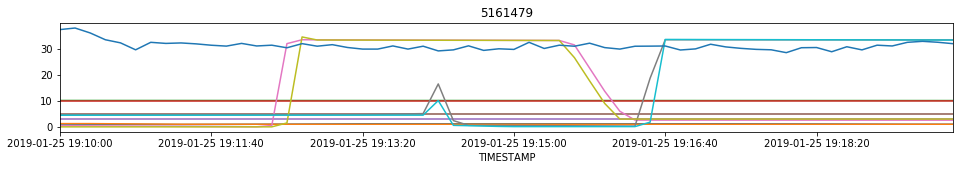

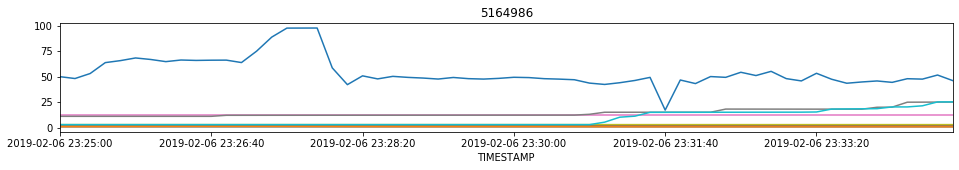

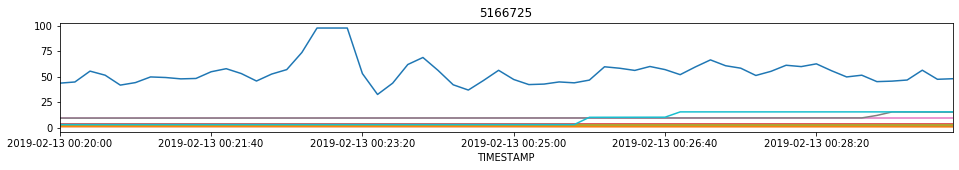

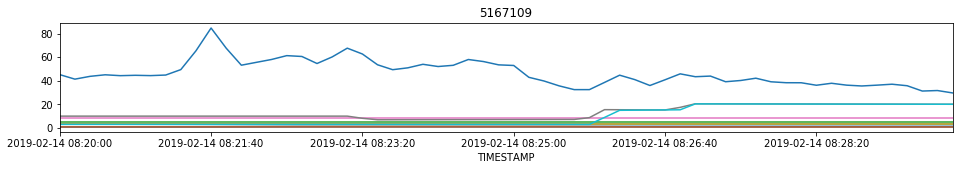

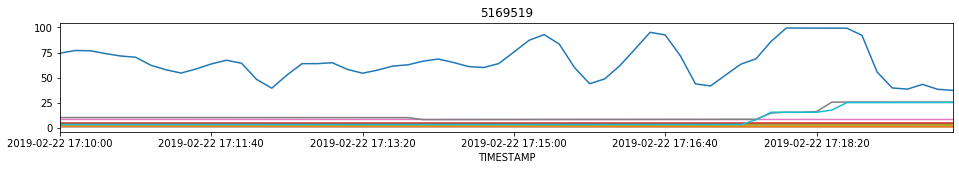

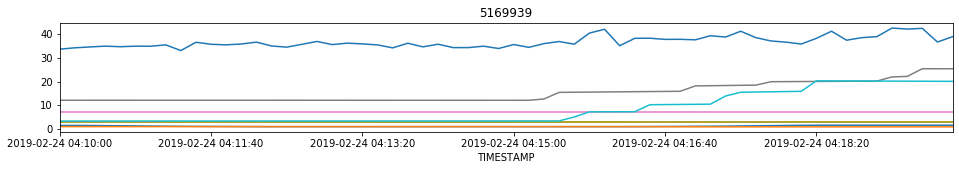

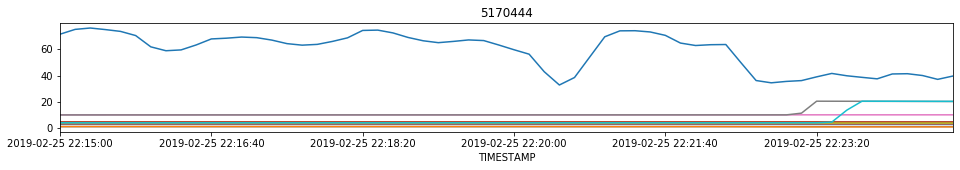

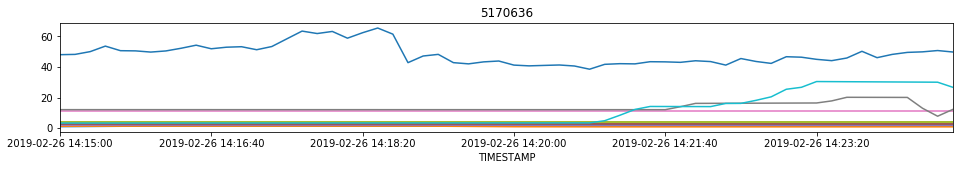

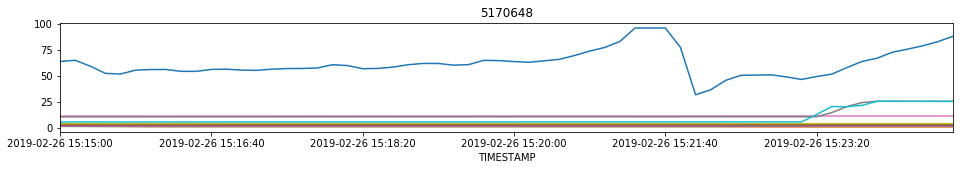

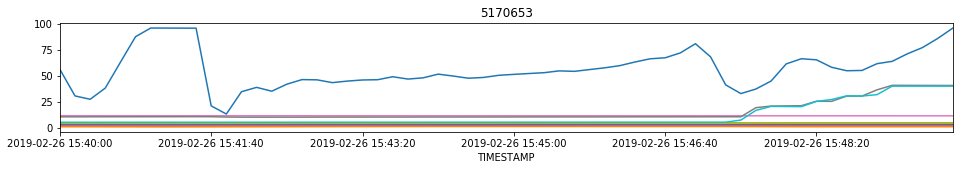

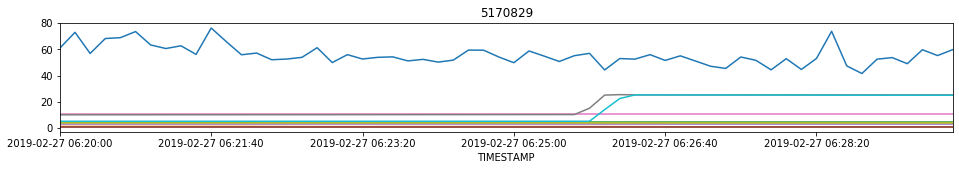

In [8]:
cls=3
filter=list(df_cls2.loc[df_cls2.clusters==cls].index)
for w in filter:
    df_ts.loc[df_ts.id.isin([w-1,w])].drop(['id']+TAGListVAL_v3,axis=1).plot(figsize=(16,2),title=w,legend=False)

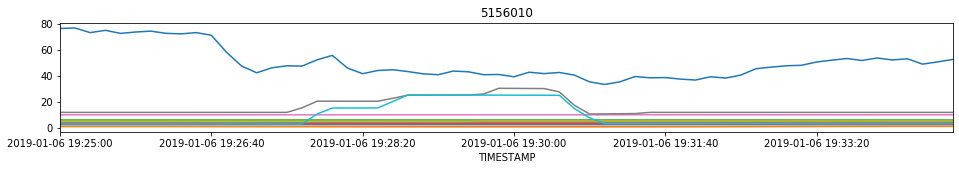

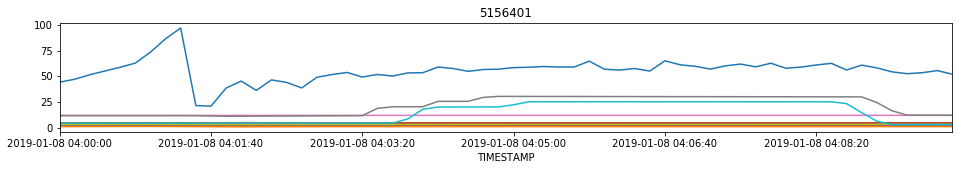

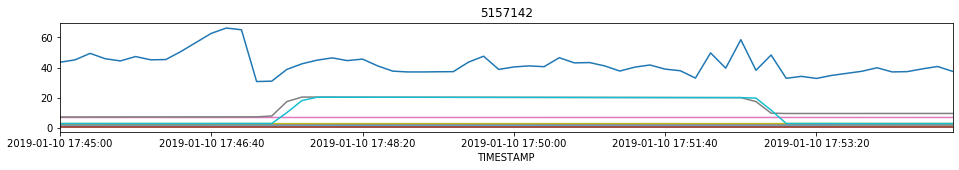

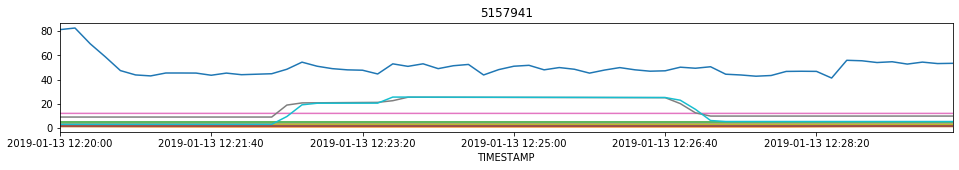

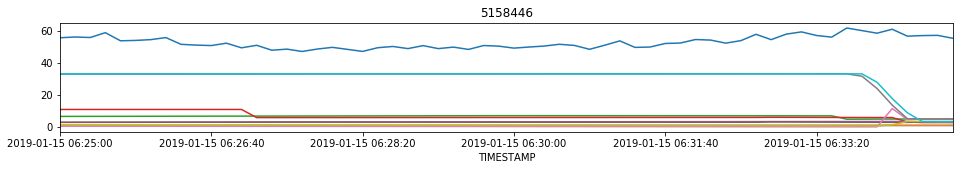

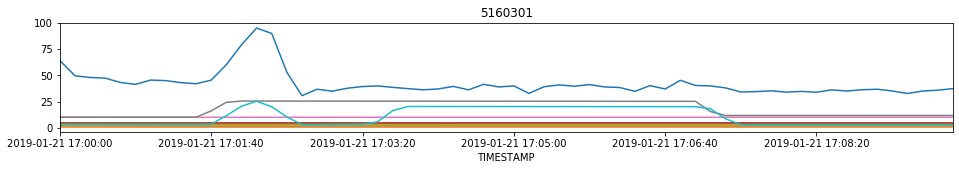

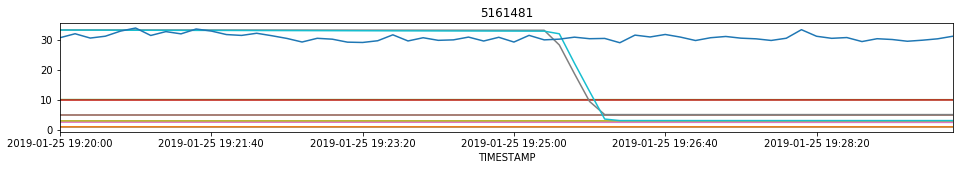

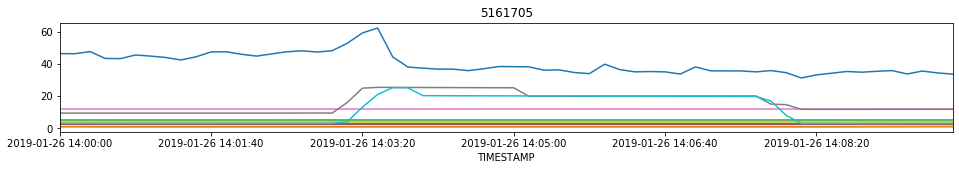

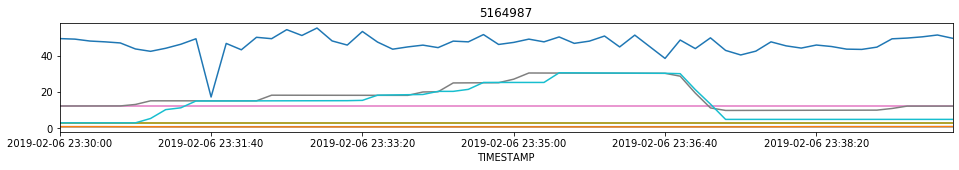

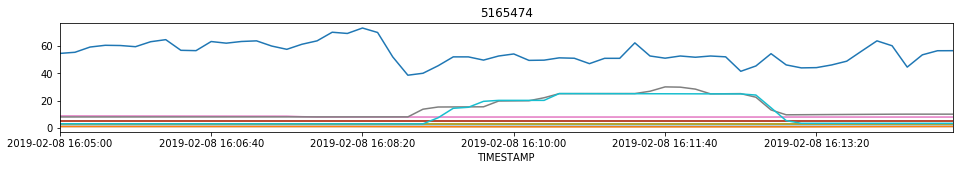

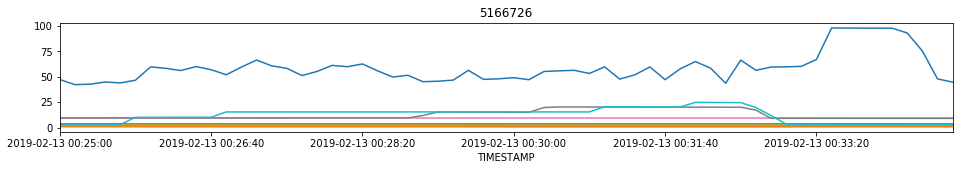

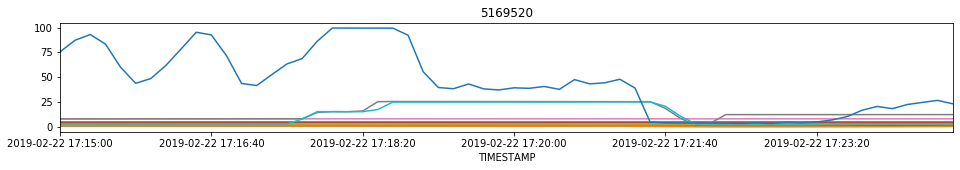

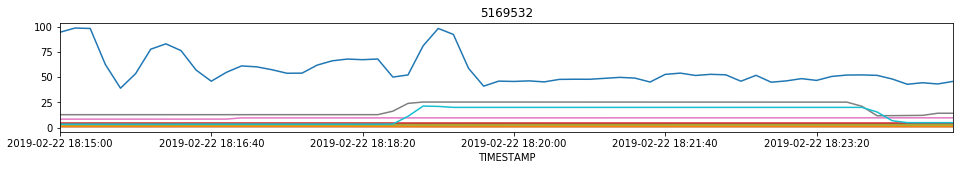

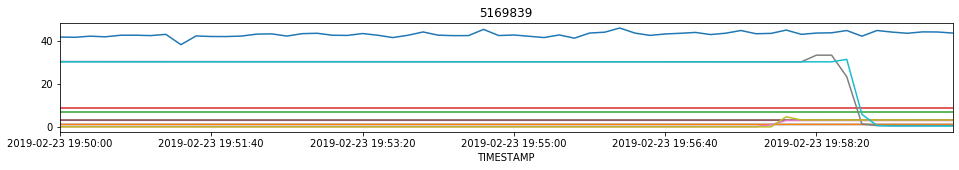

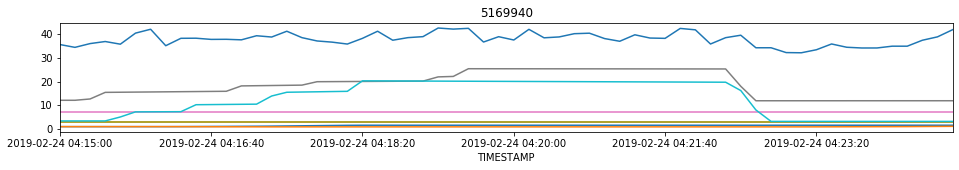

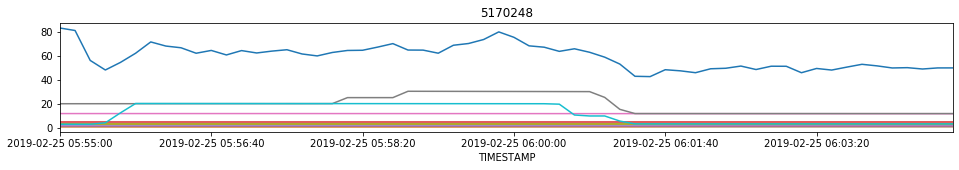

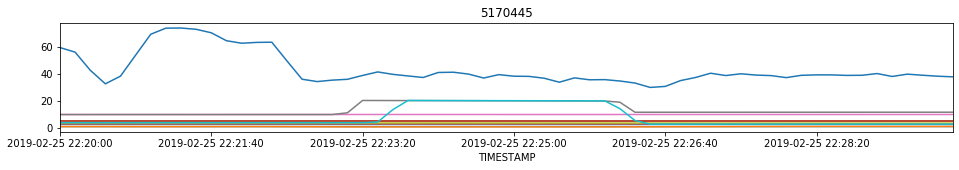

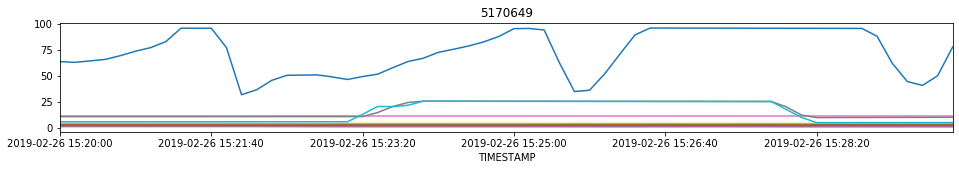

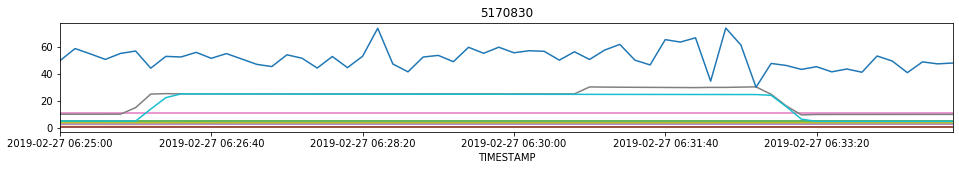

In [11]:
cls=4
filter=list(df_cls2.loc[df_cls2.clusters==cls].index)
for w in filter:
    df_ts.loc[df_ts.id.isin([w-1,w])].drop(['id']+TAGListVAL_v3,axis=1).plot(figsize=(16,2),title=w,legend=False)

In [9]:
listMetalurgia=[
5154630
,5154631
,5154650
,5154660
,5154661
,5154662
,5154663
,5154683
,5154684
,5154687
,5154688
,5154689
,5155887
,5155888
,5155889
,5155907
,5155920
,5155922
,5155985
,5155986
,5155988
,5156007
,5156008
,5156009
,5156010
,5156018
,5156019
,5156243
,5156244
,5156245
,5156400
,5156401
,5156402
,5156404
,5156408
,5156411
,5156413
,5156414
,5156415
,5157939
,5157940
,5157941
,5157951
,5157964
,5157995
,5157996
,5157997
,5158000
,5158015
,5158017
,5158018
,5158019
,5158397
,5158403
,5158404
,5158405
,5158406
,5158407
,5158408
,5158409
,5158424
,5158425
,5158438
,5158439
,5158440
,5158443
,5158444
,5158445
,5158446
,5159799
,5159809
,5159810
,5160406
,5160408
,5160410
,5160411
,5160412
,5160577
,5160578
,5160579
,5160580
,5160581
,5160582
,5160583
,5160584
,5160585
,5160586
,5160587
,5160588
,5160589
,5160590
,5160591
,5160592
,5160595
,5160596
,5160597
,5160598
,5160599
,5160600
,5160601
,5160903
,5160907
,5160908
,5161637
,5161639
,5161640
,5161641
,5161642
,5161643
,5161644
,5161645
,5161646
,5161647
,5161648
,5162335
,5163290
,5163291
,5163292
,5163304
,5163305
,5163306
,5163317
,5163318
,5163319
,5163323
,5163327
,5163328
,5163329
,5163330
,5164022
,5164024
,5164027
,5164028
,5164029
,5164036
,5164037
,5164038
,5164932
,5164933
,5164938
,5164940
,5164942
,5164943
,5164945
,5164946
,5164947
,5164951
,5165067
,5165074
,5165078
,5165088
,5165473
,5165474
,5165475
,5165482
,5165486
,5165488
,5165489
,5165490
,5165563
,5165566
,5165567
,5165568
,5165571
,5165572
,5165587
,5165588
,5166488
,5166489
,5166490
,5166497
,5166498
,5166499
,5167265
,5167269
,5167271
,5167272
,5167273
,5167274
,5167520
,5167521
,5167522
,5167542
,5167921
,5167924
,5167925
,5167926
,5167928
,5167929
,5167930
,5167931
,5169078
,5169079
,5169095
,5169101
,5169105
,5169106
,5169107
,5169108
,5169109
,5169114
,5169136
,5170107
,5170108
,5170109
,5170113
,5170116
,5170117
,5170118
,5170168
,5170169
,5170183
,5170184
,5170188
,5170190
,5170191
,5170193
,5170194
,5170196
,5170200
,5170202
,5170203
,5170204
,5170205
,5170206
,5170207
,5170208
,5170220
,5170617
,5170636
,5170637
,5170648
,5170649
,5170650
,5170651
,5170652
,5170653
,5170654
,5170655
,5170656
,5170827
,5170828
,5170829
,5170830
,5170891
,5170897
,5170900
,5171239
,5171268
,5171271
,5171272
,5171273]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C508F90DD8>]],
      dtype=object)

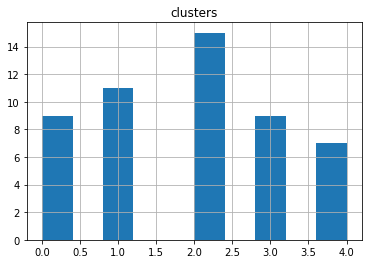

In [10]:
df_cls2.loc[df_cls2.index.isin(listMetalurgia)].hist()